# Sprint12-Project
Sprint 12: Final Project

<br>

## Project Description

As a junior analyst at TTWC Consulting Agency (<i>TripleTen World Consultancy Consulting Agency</i>), they have assigned a significant project involving a special client: AtliQ Hardware. They are a leading computer hardware producer operating across India and have expanded internationally as well. AtliQ Hardware has asked TTWC Consulting Agency to conduct a comprehensive audit of their sales operations and to implement automation measures for their existing data processes.

The client is interested in three key business domains:

1. Financial Analysis: This entails researching revenue, profits, and margin fluctuations over time, analyzing market trends, and identifying the most profitable product categories.

2. Product Analysis: This involves identifying top-selling items, strategizing methods to enhance sales performance, and examining changes in product popularity across different time frames and markets.

3. Customer Analysis: This segment focuses on customer segmentation, understanding purchasing behaviors, and devising strategies to optimize business relationships.

The objective is to delve into these areas, gather relevant data, and develop insightful dashboards for AtliQ Hardware's future reference.

As the analyst, we are assigned the responsibility of selecting one of the three research domains that piques interest and to develop a comprehensive research plan accordingly. For this project, collaboration with a team leader and peers is encouraged to ensure a thorough examination of all options.

AtliQ Hardware has provided a SQLite database backup for the analysis. Utilization of various tables within the database is permitted. However, access is restricted solely to database connections; CSV files are not provided, and the loading of the entire database into CSV format is prohibited by the company.

<br>

## Data Dictionary

The <code>dim-customer</code> contains customer-related data
- <code>customer_code</code>: unique identifier of customer. One customer can have several customer_codes.
- <code>customer</code>: company name of customer
- <code>platform</code>: platform through which the sale's been done. Customer should have one platform.
- <code>channel</code>: channel of sale. Customer may have several channels.
- <code>market</code>: country of the customer's office
- <code>sub_zone</code>: abbreviation of the region. For one market there should be one sub_zone.
- <code>region</code>: region of the customer's office. For one market there should be one region.

<br>

The <code>dim-product</code> contains product-related data
- <code>product_code</code>: unique indentifier of product
- <code>division</code>: group of the product
- <code>segment</code>: type of the product (the sub-division)
- <code>category</code>: category of the product
- <code>product</code>: full name of the product
- <code>variant</code>: variant of the product

<br>

The <code>fact_gross_price</code> contains gross price information for each product
- <code>product_code</code>: unique indentifier of product
- <code>fiscal_year</code>: year of transaction
- <code>gross_price</code>: final price for the product

<br>

The <code>fact_manufacturing_cost</code> contains the cost incurred in the production of each product
- <code>product_code</code>: unique identifier of product
- <code>cost_year</code>: year of production
- <code>manufacturing_cost</code>: cost of production of unit of product

<br>

The <code>fact_pre_discount</code> contains pre-invoice deductions information for each product 
- <code>customer_code</code>: unique identifier of customer
- <code>fiscal_year</code>: year when discount was valid
- <code>pre_invoice_discount_pct</code>: discount % per invoice for specific customer

<br>

The <code>fact_sales_monthly</code> contains monthly sales data for each product
- <code>date</code>: date of transaction
- <code>product_code</code>: unique identifier of product
- <code>customer_code</code>: unique identifier of customer
- <code>sold_quantity</code>: sold items to customer on that date
- <code>fiscal_year</code>: year of transaction

> - the project description and data dictionary can also be found through my github repository for this project: https://github.com/stxphz/Sprint12-Project/blob/main/README.md

______

# logical Data Model to visualize relationship between Tables within Database

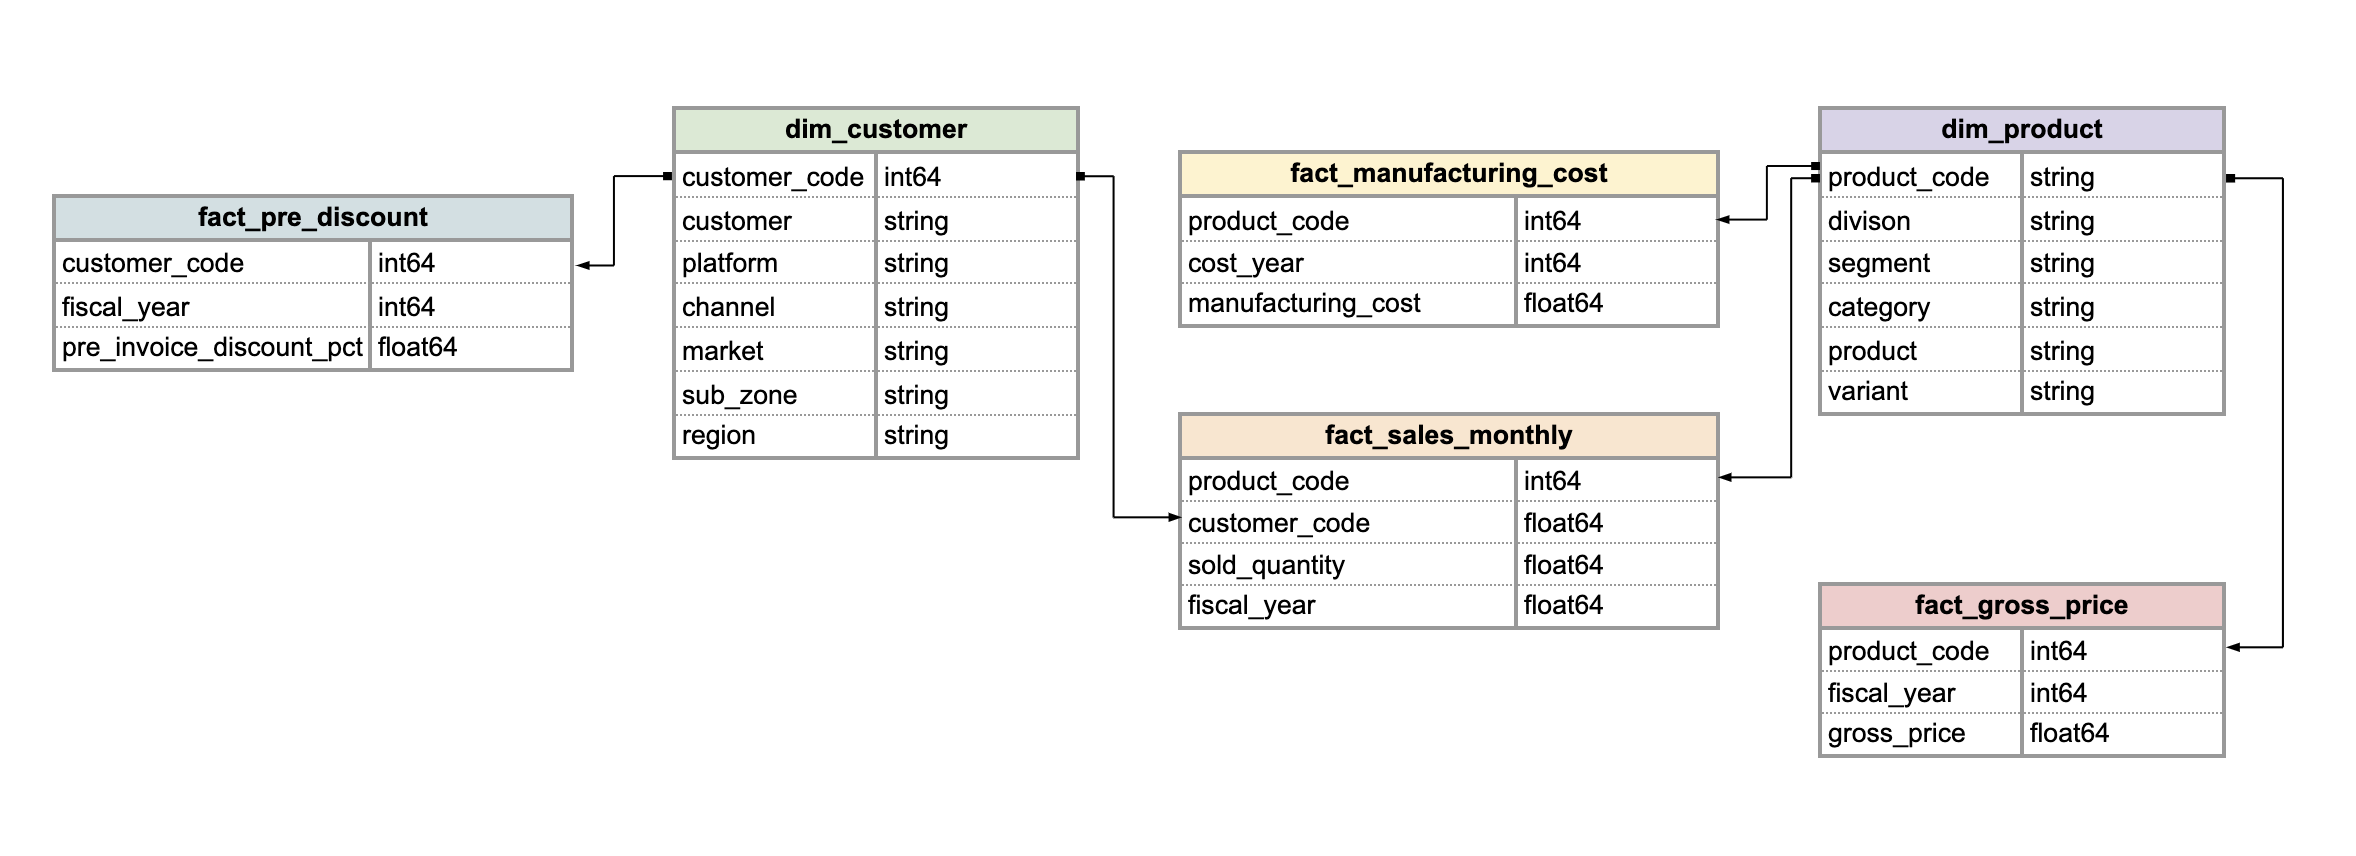

______

In [1]:
# import necessary libraries / packages to run code in this project:

import os
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns

> - the project package installation requirements can be found through my github repository for this project: https://github.com/stxphz/Sprint12-Project

-----

In [2]:
# absolute vs relative path: 
# -------------------------
# absolute = path specifies the exact location of a file or directory from the root directory of the file system
# relative = path specifies the location of a file or directory relative to the current working directory



#import os
# Get the current working directory
current_dir = os.getcwd()

# Construct the absolute path to the database file
db_path = os.path.join(current_dir, 'atliq_db.sqlite3')

# Connect to the database
con = sqlite3.connect(db_path)


In [3]:
# paste code from 'Connection to Database' section of project


### connect to the database
#import sqlite3
con = sqlite3.connect('atliq_db.sqlite3') #-->specify the path to your 
#downloaded database just like you read csv files

### check all tables in the database
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

### execute simple query in Python with your connection
query="""Select * from 
dim_customer
LIMIT 10
"""
dim_customer=pd.read_sql_query(query, con)
dim_customer.head()

[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',)]


,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


In [4]:
# from the code given in "Connection to Database", dim_customer is displayed above but it is limited to 10 rows.
# Display entire dim_customer table to dataframe and storing it to the variable 'dim_customer' 

query="""Select * from 
dim_customer
"""
dim_customer = pd.read_sql_query(query, con)
print("dim_customer dataframe:")
display(dim_customer)

dim_customer dataframe:


,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC
...,...,...,...,...,...,...,...
204,90024183,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,LATAM,LATAM
205,90024184,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM
206,90025209,Electricalsbea Stores,Brick & Mortar,Retailer,Columbia,LATAM,LATAM
207,90026205,Amazon,E-Commerce,Retailer,Mexico,LATAM,LATAM


In [5]:
# obtain general information about data in visits DataFrame including the index dtype and columns, non-null values and memory usage.

dim_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  209 non-null    int64 
 1   customer       209 non-null    object
 2   platform       209 non-null    object
 3   channel        209 non-null    object
 4   market         209 non-null    object
 5   sub_zone       209 non-null    object
 6   region         209 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.6+ KB


In [6]:
# When a column is Object type, it does not necessarily mean that all the values will be string. It can be all numbers, or a mixture of string, integers and floats.
# validate all presented columns are strings by converting it to a string datatype (will return as 'object')

dim_customer = dim_customer.astype(str)
dim_customer.dtypes

customer_code    object
customer         object
platform         object
channel          object
market           object
sub_zone         object
region           object
dtype: object

In [7]:
# make sure all columns that are presenting as string datatypes are identical where they are all lower case

# dim_customer = dim_customer.str.lower() returns an AttributeError: 'DataFrame' object has no attribute 'str'
# '.str.lower()' method is applicable to Series objects in pandas, not DataFrames directly. 
# to convert all string values in every column of the DataFrame dim_customer, need to apply the .str.lower() method to each Series individually.

# Rather applying method individually, 
# .apply(lambda x: x.astype(str).str.lower() if x.dtype == 'str' else x)
# However, it might not be working as expected due to the condition if x.dtype == 'str'. In pandas, the dtype for strings is reading it as 'object', not 'str'

dim_customer = dim_customer.apply(lambda x: x.astype(str).str.lower() if x.dtype == 'object' else x)
display(dim_customer)

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,atliq exclusive,brick & mortar,direct,india,india,apac
1,70002018,atliq e store,e-commerce,direct,india,india,apac
2,70003181,atliq exclusive,brick & mortar,direct,indonesia,roa,apac
3,70003182,atliq e store,e-commerce,direct,indonesia,roa,apac
4,70004069,atliq exclusive,brick & mortar,direct,japan,roa,apac
...,...,...,...,...,...,...,...
204,90024183,electricalsbea stores,brick & mortar,retailer,chile,latam,latam
205,90024184,amazon,e-commerce,retailer,chile,latam,latam
206,90025209,electricalsbea stores,brick & mortar,retailer,columbia,latam,latam
207,90026205,amazon,e-commerce,retailer,mexico,latam,latam


In [8]:
# validate there are no missing values in dataset

print((dim_customer).isna().sum())

customer_code    0
customer         0
platform         0
channel          0
market           0
sub_zone         0
region           0
dtype: int64


> - no missing values in dim_customer

In [9]:
# identify any duplicate rows in dataset

print(dim_customer.duplicated())
print()
print(f"total duplicate values: {dim_customer.duplicated().sum()}")

0      False
1      False
2      False
3      False
4      False
       ...  
204    False
205    False
206    False
207    False
208    False
Length: 209, dtype: bool

total duplicate values: 0


> - no duplicate rows in dim_customer

In [10]:
# one customer can have multiple customer codes
# validate how many customers in dim_customer


num_customers = dim_customer['customer'].nunique()
print("Number of unique customers:", num_customers)


Number of unique customers: 75


In [11]:
# one customer can have multiple customer codes
# validate how many customer codes per customer

customer_code_count = dim_customer.groupby('customer')['customer_code'].nunique()
print(customer_code_count)


customer
acclaimed stores        2
all-out                 1
amazon                  4
amazon                 25
argos (sainsbury's)     3
                       ..
unity stores            1
vijay sales             1
viveks                  1
walmart                 2
zone                    2
Name: customer_code, Length: 75, dtype: int64


> - amazon is shown twice as a customer (duplicate?)

In [12]:
# Standardize the entries in the 'customer' column by converting them to lowercase and stripping any leading or trailing spaces
dim_customer['customer'] = dim_customer['customer'].str.lower().str.strip()

# Count the number of unique customers after standardizing the entries
num_customers = dim_customer['customer'].nunique()
print("Number of unique customers:", num_customers)


Number of unique customers: 74


In [13]:
# validate how many customer codes per customer again after standardizing

customer_code_counts = dim_customer.groupby('customer')['customer_code'].nunique()
print(customer_code_counts)

customer
acclaimed stores        2
all-out                 1
amazon                 29
argos (sainsbury's)     3
atlas stores            2
                       ..
unity stores            1
vijay sales             1
viveks                  1
walmart                 2
zone                    2
Name: customer_code, Length: 74, dtype: int64


-----

In [14]:
# Display entire dim_product table to dataframe and storing it to the variable 'dim_product' 
query="""Select * from 
dim_product
"""
dim_product = pd.read_sql_query(query, con)
print("dim_product dataframe:")
display(dim_product)

dim_product dataframe:


,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard
...,...,...,...,...,...,...
392,A7220160202,N & S,Networking,Wi fi extender,AQ Wi Power Dx2,Plus
393,A7220160203,N & S,Networking,Wi fi extender,AQ Wi Power Dx2,Premium
394,A7321160301,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Standard
395,A7321160302,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Plus


In [15]:
# display dim_product dataframe with an expanded view of column 'product'

pd.set_option('display.max_colwidth', 200)  # Adjust the value as needed
display(dim_product)


,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard
...,...,...,...,...,...,...
392,A7220160202,N & S,Networking,Wi fi extender,AQ Wi Power Dx2,Plus
393,A7220160203,N & S,Networking,Wi fi extender,AQ Wi Power Dx2,Premium
394,A7321160301,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Standard
395,A7321160302,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Plus


In [16]:
# obtain general information about data in visits DataFrame including the index dtype and columns, non-null values and memory usage.

dim_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
 1   division      397 non-null    object
 2   segment       397 non-null    object
 3   category      397 non-null    object
 4   product       397 non-null    object
 5   variant       397 non-null    object
dtypes: object(6)
memory usage: 18.7+ KB


In [17]:
# validate all presented columns are strings by converting it to a string datatype (will return as 'object')

dim_product = dim_product.astype(str)
dim_product.dtypes

product_code    object
division        object
segment         object
category        object
product         object
variant         object
dtype: object

In [18]:
# make sure all columns that are presenting as string datatypes are identical where they are all lower case
 
dim_product = dim_product.apply(lambda x: x.astype(str).str.lower() if x.dtype == 'object' else x)
display(dim_product)

,product_code,division,segment,category,product,variant
0,a0118150101,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard
1,a0118150102,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,plus
2,a0118150103,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,premium
3,a0118150104,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,premium plus
4,a0219150201,p & a,peripherals,internal hdd,aq werewolf nas internal hard drive hdd – 8.89 cm,standard
...,...,...,...,...,...,...
392,a7220160202,n & s,networking,wi fi extender,aq wi power dx2,plus
393,a7220160203,n & s,networking,wi fi extender,aq wi power dx2,premium
394,a7321160301,n & s,networking,wi fi extender,aq wi power dx3,standard
395,a7321160302,n & s,networking,wi fi extender,aq wi power dx3,plus


In [19]:
# Standardize the entries by stripping any leading or trailing spaces
dim_product = dim_product.apply(lambda x: x.map(lambda x: x.strip() if isinstance(x, str) else x))
display(dim_product)

,product_code,division,segment,category,product,variant
0,a0118150101,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard
1,a0118150102,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,plus
2,a0118150103,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,premium
3,a0118150104,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,premium plus
4,a0219150201,p & a,peripherals,internal hdd,aq werewolf nas internal hard drive hdd – 8.89 cm,standard
...,...,...,...,...,...,...
392,a7220160202,n & s,networking,wi fi extender,aq wi power dx2,plus
393,a7220160203,n & s,networking,wi fi extender,aq wi power dx2,premium
394,a7321160301,n & s,networking,wi fi extender,aq wi power dx3,standard
395,a7321160302,n & s,networking,wi fi extender,aq wi power dx3,plus


In [20]:
# validate there are no missing values in dataset

print((dim_product).isna().sum())

product_code    0
division        0
segment         0
category        0
product         0
variant         0
dtype: int64


> - no missing values in dim_product

In [21]:
# identify any duplicate rows in dataset

print(dim_product.duplicated())
print()
print(f"total duplicate values: {dim_product.duplicated().sum()}")

0      False
1      False
2      False
3      False
4      False
       ...  
392    False
393    False
394    False
395    False
396    False
Length: 397, dtype: bool

total duplicate values: 0


> - no duplicate rows in dim_product

----

In [22]:
# Display entire fact_gross_price table to dataframe and storing it to the variable 'fact_gross_price' 
query="""Select * from 
fact_gross_price
"""
fact_gross_price = pd.read_sql_query(query, con)
print("fact_gross_price dataframe:")
display(fact_gross_price)

fact_gross_price dataframe:


,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875
...,...,...,...
1177,A7321160301,2022,44.6260
1178,A7321160302,2021,43.9446
1179,A7321160302,2022,46.0399
1180,A7321160303,2021,42.8483


In [23]:
# obtain general information about data in visits DataFrame including the index dtype and columns, non-null values and memory usage.

fact_gross_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_code  1182 non-null   object 
 1   fiscal_year   1182 non-null   int64  
 2   gross_price   1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [24]:
# Standardize the entries in the 'product_code' column by converting them to lowercase and stripping any leading or trailing spaces

fact_gross_price['product_code'] = fact_gross_price['product_code'].str.lower().str.strip()
display(fact_gross_price)

,product_code,fiscal_year,gross_price
0,a0118150101,2018,15.3952
1,a0118150101,2019,14.4392
2,a0118150101,2020,16.2323
3,a0118150101,2021,19.0573
4,a0118150102,2018,19.5875
...,...,...,...
1177,a7321160301,2022,44.6260
1178,a7321160302,2021,43.9446
1179,a7321160302,2022,46.0399
1180,a7321160303,2021,42.8483


In [25]:
# validate there are no missing values in dataset

print((fact_gross_price).isna().sum())

product_code    0
fiscal_year     0
gross_price     0
dtype: int64


> - no missing values in fact_gross_price

In [26]:
# identify any duplicate rows in dataset

print(fact_gross_price.duplicated())
print()
print(f"total duplicate values: {fact_gross_price.duplicated().sum()}")

0       False
1       False
2       False
3       False
4       False
        ...  
1177    False
1178    False
1179    False
1180    False
1181    False
Length: 1182, dtype: bool

total duplicate values: 0


> - no duplicate rows in fact_gross_price

------

In [27]:
# Display entire fact_manufacturing_cost table to dataframe and storing it to the variable 'fact_manufacturing_cost' 
query="""Select * from 
fact_manufacturing_cost
"""
fact_manufacturing_cost = pd.read_sql_query(query, con)
print("fact_manufacturing_cost dataframe:")
display(fact_manufacturing_cost)

fact_manufacturing_cost dataframe:


,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036
...,...,...,...
1177,A7321160301,2022,13.4069
1178,A7321160302,2021,12.5670
1179,A7321160302,2022,13.1954
1180,A7321160303,2021,12.9502


In [28]:
# obtain general information about data in visits DataFrame including the index dtype and columns, non-null values and memory usage.

fact_manufacturing_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        1182 non-null   object 
 1   cost_year           1182 non-null   int64  
 2   manufacturing_cost  1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [29]:
# Standardize the entries in the 'product_code' column by converting them to lowercase and stripping any leading or trailing spaces

fact_manufacturing_cost['product_code'] = fact_manufacturing_cost['product_code'].str.lower().str.strip()
display(fact_manufacturing_cost)

,product_code,cost_year,manufacturing_cost
0,a0118150101,2018,4.6190
1,a0118150101,2019,4.2033
2,a0118150101,2020,5.0207
3,a0118150101,2021,5.5172
4,a0118150102,2018,5.6036
...,...,...,...
1177,a7321160301,2022,13.4069
1178,a7321160302,2021,12.5670
1179,a7321160302,2022,13.1954
1180,a7321160303,2021,12.9502


In [30]:
# validate there are no missing values in dataset

print((fact_manufacturing_cost).isna().sum())

product_code          0
cost_year             0
manufacturing_cost    0
dtype: int64


> - no missing values in fact_manufacturing_cost

In [31]:
# identify any duplicate rows in dataset

print(fact_manufacturing_cost.duplicated())
print()
print(f"total duplicate values: {fact_manufacturing_cost.duplicated().sum()}")

0       False
1       False
2       False
3       False
4       False
        ...  
1177    False
1178    False
1179    False
1180    False
1181    False
Length: 1182, dtype: bool

total duplicate values: 0


> - no duplicate rows in fact_manufacturing_cost

-----

In [32]:
# Display entire fact_pre_discount table to dataframe and storing it to the variable 'fact_pre_discount' 
query="""Select * from 
fact_pre_discount
"""
fact_pre_discount = pd.read_sql_query(query, con)
print("fact_pre_discount dataframe:")
display(fact_pre_discount)

fact_pre_discount dataframe:


,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057
...,...,...,...
1040,90027207,2018,0.2803
1041,90027207,2019,0.2248
1042,90027207,2020,0.2386
1043,90027207,2021,0.2772


In [33]:
# obtain general information about data in visits DataFrame including the index dtype and columns, non-null values and memory usage.

fact_pre_discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_code             1045 non-null   int64  
 1   fiscal_year               1045 non-null   int64  
 2   pre_invoice_discount_pct  1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 24.6 KB


In [34]:
# convert 'customer_code' to str to standarize object type 

fact_pre_discount['customer_code'] = fact_pre_discount['customer_code'].astype('str')
fact_pre_discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_code             1045 non-null   object 
 1   fiscal_year               1045 non-null   int64  
 2   pre_invoice_discount_pct  1045 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 24.6+ KB


In [35]:
# Standardize the entries in the 'customer_code' column by converting them to lowercase and stripping any leading or trailing spaces

fact_pre_discount['customer_code'] = fact_pre_discount['customer_code'].str.lower().str.strip()
display(fact_pre_discount)

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057
...,...,...,...
1040,90027207,2018,0.2803
1041,90027207,2019,0.2248
1042,90027207,2020,0.2386
1043,90027207,2021,0.2772


In [36]:
# validate there are no missing values in dataset

print((fact_pre_discount).isna().sum())

customer_code               0
fiscal_year                 0
pre_invoice_discount_pct    0
dtype: int64


> - no missing values in fact_pre_discount

In [37]:
# identify any duplicate rows in dataset

print(fact_pre_discount.duplicated())
print()
print(f"total duplicate values: {fact_pre_discount.duplicated().sum()}")

0       False
1       False
2       False
3       False
4       False
        ...  
1040    False
1041    False
1042    False
1043    False
1044    False
Length: 1045, dtype: bool

total duplicate values: 0


> - no duplicate rows in fact_pre_discount

-----

In [38]:
# Display entire fact_sales_monthly table to dataframe and storing it to the variable 'fact_sales_monthly' 
query="""Select * from 
fact_sales_monthly
"""
fact_sales_monthly = pd.read_sql_query(query, con)
print("fact_sales_monthly dataframe:")
display(fact_sales_monthly)

fact_sales_monthly dataframe:


,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.0,51.0,2018.0
1,2017-09-01,A0118150101,70002018.0,77.0,2018.0
2,2017-09-01,A0118150101,70003181.0,17.0,2018.0
3,2017-09-01,A0118150101,70003182.0,6.0,2018.0
4,2017-09-01,A0118150101,70006157.0,5.0,2018.0
...,...,...,...,...,...
67246,2019-06-01,A0418150104,90013124.0,16.0,2019.0
67247,2019-06-01,A0418150104,90014136.0,2.0,2019.0
67248,2019-06-01,A0418150104,90014137.0,1.0,2019.0
67249,2019-06-01,A0418150104,90014140.0,3.0,2019.0


In [39]:
# obtain general information about data in visits DataFrame including the index dtype and columns, non-null values and memory usage.

fact_sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67251 entries, 0 to 67250
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           67251 non-null  object 
 1   product_code   67251 non-null  object 
 2   customer_code  67250 non-null  float64
 3   sold_quantity  67250 non-null  float64
 4   fiscal_year    67250 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.6+ MB


In [40]:
# validate there are no missing values in dataset

print((fact_sales_monthly).isna().sum())

date             0
product_code     0
customer_code    1
sold_quantity    1
fiscal_year      1
dtype: int64


> - there is one missing value in 'customer_code', 'sold_quantity', and 'fiscal_year' in fact_sales_monthly

In [41]:
# Drop rows with NaN values 

fact_sales_monthly = fact_sales_monthly.dropna()
display(fact_sales_monthly)

# deciding to drop the row because the product_code only contains two characters while the rest of the data contains 11 characters in product_code

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.0,51.0,2018.0
1,2017-09-01,A0118150101,70002018.0,77.0,2018.0
2,2017-09-01,A0118150101,70003181.0,17.0,2018.0
3,2017-09-01,A0118150101,70003182.0,6.0,2018.0
4,2017-09-01,A0118150101,70006157.0,5.0,2018.0
...,...,...,...,...,...
67245,2019-06-01,A0418150104,90013122.0,10.0,2019.0
67246,2019-06-01,A0418150104,90013124.0,16.0,2019.0
67247,2019-06-01,A0418150104,90014136.0,2.0,2019.0
67248,2019-06-01,A0418150104,90014137.0,1.0,2019.0


In [42]:
# convert 'customer_code' to str to standarize object type and get rid of float .0


# Convert 'customer_code' to string type
fact_sales_monthly['customer_code'] = fact_sales_monthly['customer_code'].astype(str)

# Remove '.0' suffix from values
fact_sales_monthly['customer_code'] = fact_sales_monthly['customer_code'].str.replace('.0', '')
display(fact_sales_monthly)


,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017,51.0,2018.0
1,2017-09-01,A0118150101,70002018,77.0,2018.0
2,2017-09-01,A0118150101,70003181,17.0,2018.0
3,2017-09-01,A0118150101,70003182,6.0,2018.0
4,2017-09-01,A0118150101,70006157,5.0,2018.0
...,...,...,...,...,...
67245,2019-06-01,A0418150104,90013122,10.0,2019.0
67246,2019-06-01,A0418150104,90013124,16.0,2019.0
67247,2019-06-01,A0418150104,90014136,2.0,2019.0
67248,2019-06-01,A0418150104,90014137,1.0,2019.0


In [43]:
# Standardize the entries in the 'customer_code' and 'product_code' columns by converting them to lowercase and stripping any leading or trailing spaces

fact_sales_monthly['product_code'] = fact_sales_monthly['product_code'].str.lower().str.strip()
fact_sales_monthly['customer_code'] = fact_sales_monthly['customer_code'].str.lower().str.strip()

display(fact_sales_monthly)


,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,a0118150101,70002017,51.0,2018.0
1,2017-09-01,a0118150101,70002018,77.0,2018.0
2,2017-09-01,a0118150101,70003181,17.0,2018.0
3,2017-09-01,a0118150101,70003182,6.0,2018.0
4,2017-09-01,a0118150101,70006157,5.0,2018.0
...,...,...,...,...,...
67245,2019-06-01,a0418150104,90013122,10.0,2019.0
67246,2019-06-01,a0418150104,90013124,16.0,2019.0
67247,2019-06-01,a0418150104,90014136,2.0,2019.0
67248,2019-06-01,a0418150104,90014137,1.0,2019.0


In [44]:
# 'fiscal_year' does not need to be a float, convert to 'int' to remove '.0' suffix from values

fact_sales_monthly['fiscal_year'] = fact_sales_monthly['fiscal_year'].astype('int')
display(fact_sales_monthly)

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,a0118150101,70002017,51.0,2018
1,2017-09-01,a0118150101,70002018,77.0,2018
2,2017-09-01,a0118150101,70003181,17.0,2018
3,2017-09-01,a0118150101,70003182,6.0,2018
4,2017-09-01,a0118150101,70006157,5.0,2018
...,...,...,...,...,...
67245,2019-06-01,a0418150104,90013122,10.0,2019
67246,2019-06-01,a0418150104,90013124,16.0,2019
67247,2019-06-01,a0418150104,90014136,2.0,2019
67248,2019-06-01,a0418150104,90014137,1.0,2019


In [45]:
# identify any duplicate rows in dataset

print(fact_sales_monthly.duplicated())
print()
print(f"total duplicate values: {fact_sales_monthly.duplicated().sum()}")

0        False
1        False
2        False
3        False
4        False
         ...  
67245    False
67246    False
67247    False
67248    False
67249    False
Length: 67250, dtype: bool

total duplicate values: 0


> - no duplicate rows in fact_sales_monthly

------

In [46]:
# display all cleaned dataframes from database 

print('cleaned dim_customer:')
display(dim_customer)

print('cleaned dim_product:')
display(dim_product)

print('cleaned fact_gross_price:')
display(fact_gross_price)

print('cleaned fact_manufacturing_cost:')
display(fact_manufacturing_cost)

print('cleaned fact_pre_discount:')
display(fact_pre_discount)

print('cleaned fact_sales_monthly:')
display(fact_sales_monthly)

cleaned dim_customer:


,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,atliq exclusive,brick & mortar,direct,india,india,apac
1,70002018,atliq e store,e-commerce,direct,india,india,apac
2,70003181,atliq exclusive,brick & mortar,direct,indonesia,roa,apac
3,70003182,atliq e store,e-commerce,direct,indonesia,roa,apac
4,70004069,atliq exclusive,brick & mortar,direct,japan,roa,apac
...,...,...,...,...,...,...,...
204,90024183,electricalsbea stores,brick & mortar,retailer,chile,latam,latam
205,90024184,amazon,e-commerce,retailer,chile,latam,latam
206,90025209,electricalsbea stores,brick & mortar,retailer,columbia,latam,latam
207,90026205,amazon,e-commerce,retailer,mexico,latam,latam


cleaned dim_product:


,product_code,division,segment,category,product,variant
0,a0118150101,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard
1,a0118150102,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,plus
2,a0118150103,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,premium
3,a0118150104,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,premium plus
4,a0219150201,p & a,peripherals,internal hdd,aq werewolf nas internal hard drive hdd – 8.89 cm,standard
...,...,...,...,...,...,...
392,a7220160202,n & s,networking,wi fi extender,aq wi power dx2,plus
393,a7220160203,n & s,networking,wi fi extender,aq wi power dx2,premium
394,a7321160301,n & s,networking,wi fi extender,aq wi power dx3,standard
395,a7321160302,n & s,networking,wi fi extender,aq wi power dx3,plus


cleaned fact_gross_price:


,product_code,fiscal_year,gross_price
0,a0118150101,2018,15.3952
1,a0118150101,2019,14.4392
2,a0118150101,2020,16.2323
3,a0118150101,2021,19.0573
4,a0118150102,2018,19.5875
...,...,...,...
1177,a7321160301,2022,44.6260
1178,a7321160302,2021,43.9446
1179,a7321160302,2022,46.0399
1180,a7321160303,2021,42.8483


cleaned fact_manufacturing_cost:


,product_code,cost_year,manufacturing_cost
0,a0118150101,2018,4.6190
1,a0118150101,2019,4.2033
2,a0118150101,2020,5.0207
3,a0118150101,2021,5.5172
4,a0118150102,2018,5.6036
...,...,...,...
1177,a7321160301,2022,13.4069
1178,a7321160302,2021,12.5670
1179,a7321160302,2022,13.1954
1180,a7321160303,2021,12.9502


cleaned fact_pre_discount:


,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057
...,...,...,...
1040,90027207,2018,0.2803
1041,90027207,2019,0.2248
1042,90027207,2020,0.2386
1043,90027207,2021,0.2772


cleaned fact_sales_monthly:


,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,a0118150101,70002017,51.0,2018
1,2017-09-01,a0118150101,70002018,77.0,2018
2,2017-09-01,a0118150101,70003181,17.0,2018
3,2017-09-01,a0118150101,70003182,6.0,2018
4,2017-09-01,a0118150101,70006157,5.0,2018
...,...,...,...,...,...
67245,2019-06-01,a0418150104,90013122,10.0,2019
67246,2019-06-01,a0418150104,90013124,16.0,2019
67247,2019-06-01,a0418150104,90014136,2.0,2019
67248,2019-06-01,a0418150104,90014137,1.0,2019


____

In [47]:
# join dataframes concerning sale of products (fact_gross_price and fact_sales_monthly)
sales_product = pd.merge(fact_gross_price, fact_sales_monthly, on=['product_code', 'fiscal_year'], how='inner')
print('sales_product dataframe:')
display(sales_product)

# join sales_product with dim_customer
sales_customer = pd.merge(sales_product, dim_customer, on='customer_code', how='inner')
print('sales_customer dataframe:')
display(sales_customer)

sales_product dataframe:


,product_code,fiscal_year,gross_price,date,customer_code,sold_quantity
0,a0118150101,2018,15.3952,2017-09-01,70002017,51.0
1,a0118150101,2018,15.3952,2017-09-01,70002018,77.0
2,a0118150101,2018,15.3952,2017-09-01,70003181,17.0
3,a0118150101,2018,15.3952,2017-09-01,70003182,6.0
4,a0118150101,2018,15.3952,2017-09-01,70006157,5.0
...,...,...,...,...,...,...
67245,a0418150104,2019,17.5027,2019-06-01,90013122,10.0
67246,a0418150104,2019,17.5027,2019-06-01,90013124,16.0
67247,a0418150104,2019,17.5027,2019-06-01,90014136,2.0
67248,a0418150104,2019,17.5027,2019-06-01,90014137,1.0


sales_customer dataframe:


,product_code,fiscal_year,gross_price,date,customer_code,sold_quantity,customer,platform,channel,market,sub_zone,region
0,a0118150101,2018,15.3952,2017-09-01,70002017,51.0,atliq exclusive,brick & mortar,direct,india,india,apac
1,a0118150101,2018,15.3952,2017-09-01,70002018,77.0,atliq e store,e-commerce,direct,india,india,apac
2,a0118150101,2018,15.3952,2017-09-01,70003181,17.0,atliq exclusive,brick & mortar,direct,indonesia,roa,apac
3,a0118150101,2018,15.3952,2017-09-01,70003182,6.0,atliq e store,e-commerce,direct,indonesia,roa,apac
4,a0118150101,2018,15.3952,2017-09-01,70006157,5.0,atliq exclusive,brick & mortar,direct,philiphines,roa,apac
...,...,...,...,...,...,...,...,...,...,...,...,...
67245,a0418150104,2019,17.5027,2019-06-01,90013122,10.0,radio popular,brick & mortar,retailer,italy,se,eu
67246,a0418150104,2019,17.5027,2019-06-01,90013124,16.0,amazon,e-commerce,retailer,italy,se,eu
67247,a0418150104,2019,17.5027,2019-06-01,90014136,2.0,reliance digital,brick & mortar,retailer,netherlands,ne,eu
67248,a0418150104,2019,17.5027,2019-06-01,90014137,1.0,media markt,brick & mortar,retailer,netherlands,ne,eu


In [48]:
# join dataframes concerning customer discount
customer_discount = pd.merge(dim_customer, fact_pre_discount, on='customer_code', how='inner')
print('customer_discount dataframe:')
display(customer_discount)

customer_discount dataframe:


,customer_code,customer,platform,channel,market,sub_zone,region,fiscal_year,pre_invoice_discount_pct
0,70002017,atliq exclusive,brick & mortar,direct,india,india,apac,2018,0.0824
1,70002017,atliq exclusive,brick & mortar,direct,india,india,apac,2019,0.0777
2,70002017,atliq exclusive,brick & mortar,direct,india,india,apac,2020,0.0735
3,70002017,atliq exclusive,brick & mortar,direct,india,india,apac,2021,0.0703
4,70002017,atliq exclusive,brick & mortar,direct,india,india,apac,2022,0.1057
...,...,...,...,...,...,...,...,...,...
1040,90027207,amazon,e-commerce,retailer,brazil,latam,latam,2018,0.2803
1041,90027207,amazon,e-commerce,retailer,brazil,latam,latam,2019,0.2248
1042,90027207,amazon,e-commerce,retailer,brazil,latam,latam,2020,0.2386
1043,90027207,amazon,e-commerce,retailer,brazil,latam,latam,2021,0.2772


In [49]:
# join sales_customer with dim_product
sales_customer_product = pd.merge(sales_customer, dim_product, on='product_code', how='inner')
print('sales_customer_product dataframe:')
display(sales_customer_product)

sales_customer_product dataframe:


,product_code,fiscal_year,gross_price,date,customer_code,sold_quantity,customer,platform,channel,market,sub_zone,region,division,segment,category,product,variant
0,a0118150101,2018,15.3952,2017-09-01,70002017,51.0,atliq exclusive,brick & mortar,direct,india,india,apac,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard
1,a0118150101,2018,15.3952,2017-09-01,70002018,77.0,atliq e store,e-commerce,direct,india,india,apac,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard
2,a0118150101,2018,15.3952,2017-09-01,70003181,17.0,atliq exclusive,brick & mortar,direct,indonesia,roa,apac,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard
3,a0118150101,2018,15.3952,2017-09-01,70003182,6.0,atliq e store,e-commerce,direct,indonesia,roa,apac,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard
4,a0118150101,2018,15.3952,2017-09-01,70006157,5.0,atliq exclusive,brick & mortar,direct,philiphines,roa,apac,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67245,a0418150104,2019,17.5027,2019-06-01,90013122,10.0,radio popular,brick & mortar,retailer,italy,se,eu,p & a,peripherals,graphic card,aq mforce gen x,plus 1
67246,a0418150104,2019,17.5027,2019-06-01,90013124,16.0,amazon,e-commerce,retailer,italy,se,eu,p & a,peripherals,graphic card,aq mforce gen x,plus 1
67247,a0418150104,2019,17.5027,2019-06-01,90014136,2.0,reliance digital,brick & mortar,retailer,netherlands,ne,eu,p & a,peripherals,graphic card,aq mforce gen x,plus 1
67248,a0418150104,2019,17.5027,2019-06-01,90014137,1.0,media markt,brick & mortar,retailer,netherlands,ne,eu,p & a,peripherals,graphic card,aq mforce gen x,plus 1


In [50]:
fact_manufacturing_cost

,product_code,cost_year,manufacturing_cost
0,a0118150101,2018,4.6190
1,a0118150101,2019,4.2033
2,a0118150101,2020,5.0207
3,a0118150101,2021,5.5172
4,a0118150102,2018,5.6036
...,...,...,...
1177,a7321160301,2022,13.4069
1178,a7321160302,2021,12.5670
1179,a7321160302,2022,13.1954
1180,a7321160303,2021,12.9502


In [51]:
# join sales_customer_product with fact_manufacturing_cost

# rename 'cost_year' to 'fiscal_year' in fact_manufacturing_cost to join on 
fact_manufacturing_cost.rename(columns={'cost_year': 'fiscal_year'}, inplace=True)


sales_customer_product_cost = pd.merge(sales_customer_product, fact_manufacturing_cost, on=['product_code', 'fiscal_year'], how='inner')
print('sales_customer_product_cost dataframe:')
display(sales_customer_product_cost)

sales_customer_product_cost dataframe:


,product_code,fiscal_year,gross_price,date,customer_code,sold_quantity,customer,platform,channel,market,sub_zone,region,division,segment,category,product,variant,manufacturing_cost
0,a0118150101,2018,15.3952,2017-09-01,70002017,51.0,atliq exclusive,brick & mortar,direct,india,india,apac,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard,4.6190
1,a0118150101,2018,15.3952,2017-09-01,70002018,77.0,atliq e store,e-commerce,direct,india,india,apac,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard,4.6190
2,a0118150101,2018,15.3952,2017-09-01,70003181,17.0,atliq exclusive,brick & mortar,direct,indonesia,roa,apac,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard,4.6190
3,a0118150101,2018,15.3952,2017-09-01,70003182,6.0,atliq e store,e-commerce,direct,indonesia,roa,apac,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard,4.6190
4,a0118150101,2018,15.3952,2017-09-01,70006157,5.0,atliq exclusive,brick & mortar,direct,philiphines,roa,apac,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard,4.6190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67245,a0418150104,2019,17.5027,2019-06-01,90013122,10.0,radio popular,brick & mortar,retailer,italy,se,eu,p & a,peripherals,graphic card,aq mforce gen x,plus 1,5.3129
67246,a0418150104,2019,17.5027,2019-06-01,90013124,16.0,amazon,e-commerce,retailer,italy,se,eu,p & a,peripherals,graphic card,aq mforce gen x,plus 1,5.3129
67247,a0418150104,2019,17.5027,2019-06-01,90014136,2.0,reliance digital,brick & mortar,retailer,netherlands,ne,eu,p & a,peripherals,graphic card,aq mforce gen x,plus 1,5.3129
67248,a0418150104,2019,17.5027,2019-06-01,90014137,1.0,media markt,brick & mortar,retailer,netherlands,ne,eu,p & a,peripherals,graphic card,aq mforce gen x,plus 1,5.3129


_____

<h1> Product Analysis </h1>

> - Customer to Product Metrics Research

In [52]:
# How many total unique products are being purchased? 

# Find the total number of unique products
total_unique_products = sales_customer_product['product'].nunique()
print("Total number of unique products:", total_unique_products)


Total number of unique products: 4


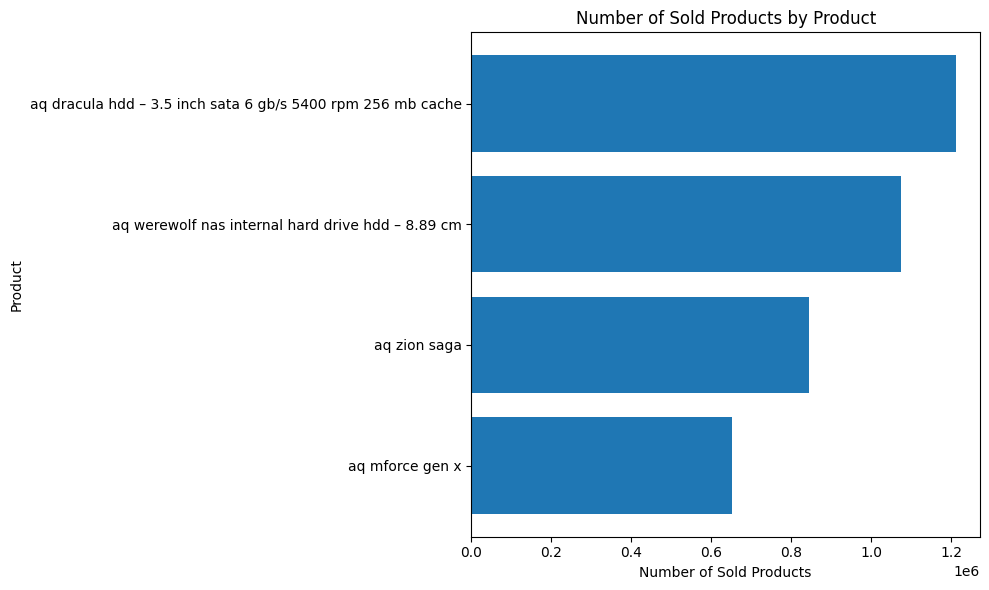

Highest Selling Product:
product          aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache
sold_quantity                                                      1211581.0
Name: 0, dtype: object

Lowest Selling Product:
product          aq mforce gen x
sold_quantity           652536.0
Name: 1, dtype: object


In [53]:
# How many are sold within each unique product?



# Group by product and sum the sold quantities
product_sales = sales_customer_product.groupby('product')['sold_quantity'].sum().reset_index()

# Sort the products by sold quantity in descending order
product_sales_sorted = product_sales.sort_values(by='sold_quantity', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(product_sales_sorted['product'], product_sales_sorted['sold_quantity'])
plt.xlabel('Number of Sold Products')
plt.ylabel('Product')
plt.title('Number of Sold Products by Product')
plt.gca().invert_yaxis()  # Invert y-axis to display products with highest sales at the top
plt.tight_layout()
plt.show()


# Sort the products by sold quantity in descending order to find the highest selling product
highest_selling_product = product_sales.sort_values(by='sold_quantity', ascending=False).iloc[0]
print("Highest Selling Product:")
print(highest_selling_product)

# Sort the products by sold quantity in ascending order to find the lowest selling product
lowest_selling_product = product_sales.sort_values(by='sold_quantity').iloc[0]
print("\nLowest Selling Product:")
print(lowest_selling_product)


> - <u>Number of Products Sold</u>: There are a total of 4 products being sold. The highest selling product is "aq dracula hdd - 3.5 inch sata 6gb/s 5400rpm 256mb cache" and the least is "aq mforce gen x".

Category with the most products: internal hdd


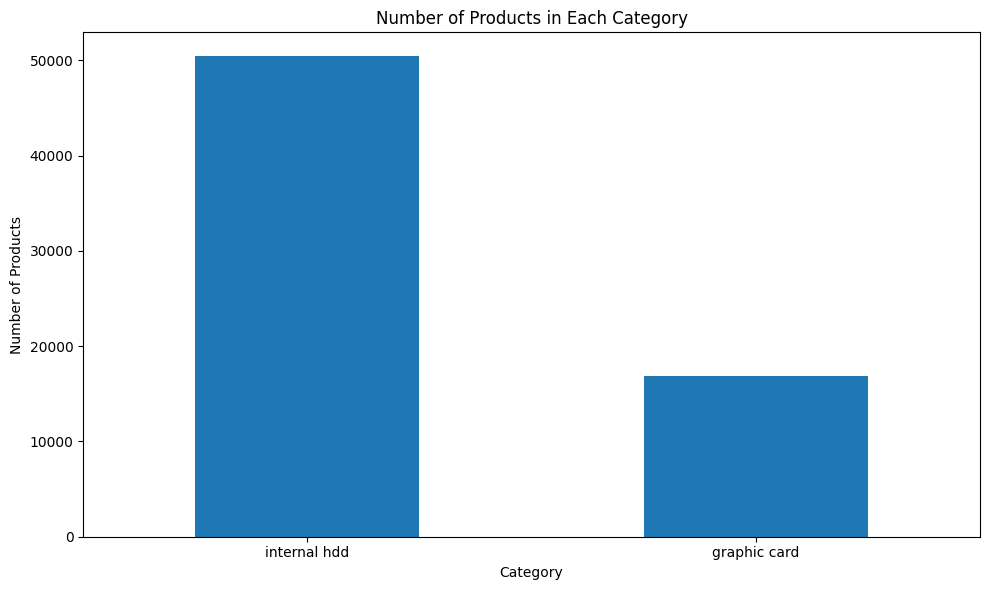

In [54]:
# Which category has the most products? 


# Find the category with the most products
most_common_category = sales_customer_product['category'].value_counts().idxmax()
print("Category with the most products:", most_common_category)


# Count the number of products in each category
category_counts = sales_customer_product['category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.title('Number of Products in Each Category')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

> - <u>Number of Products in each Category</u>: There are two unique categories. Internal hdd has more products in its category comparied to graphic card. 

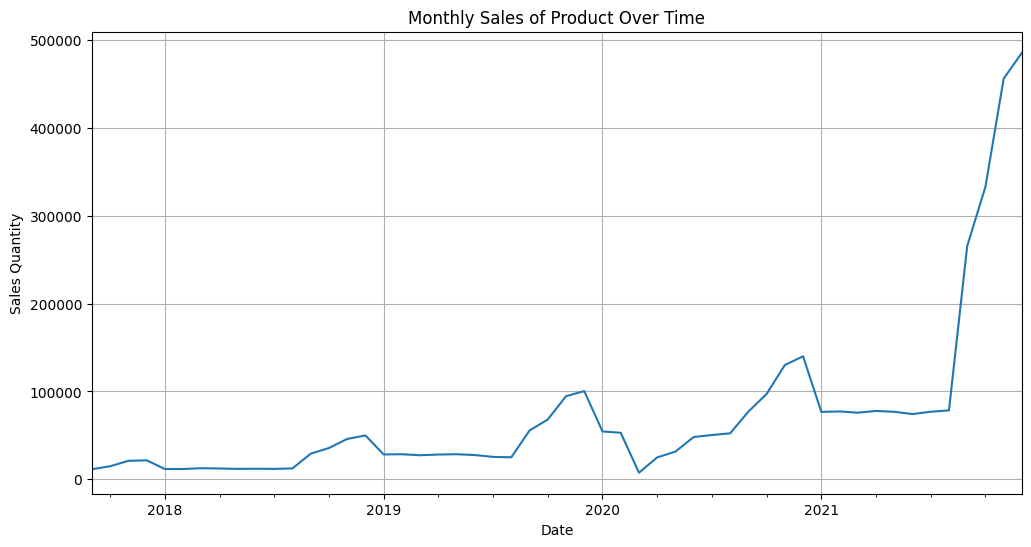

In [55]:
# Trend analysis:
# What does the monthly sale of products over time look like? 



# Convert 'date' column to datetime type
sales_customer_product['date'] = pd.to_datetime(sales_customer_product['date'])

# Set 'date' column as index (since it's not already)
sales_customer_product.set_index('date', inplace=True)

# Resample the data to monthly frequency and sum the sales for each month
monthly_sales = sales_customer_product['sold_quantity'].resample('ME').sum()

# Visualize the data
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales of Product Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.grid(True)
plt.show()

> - <u>Monthly Sales of Product Over Time</u>: Sales increase over time with few areas of plateau which could indicate low sales. There is major spike in sales after year 2021. 

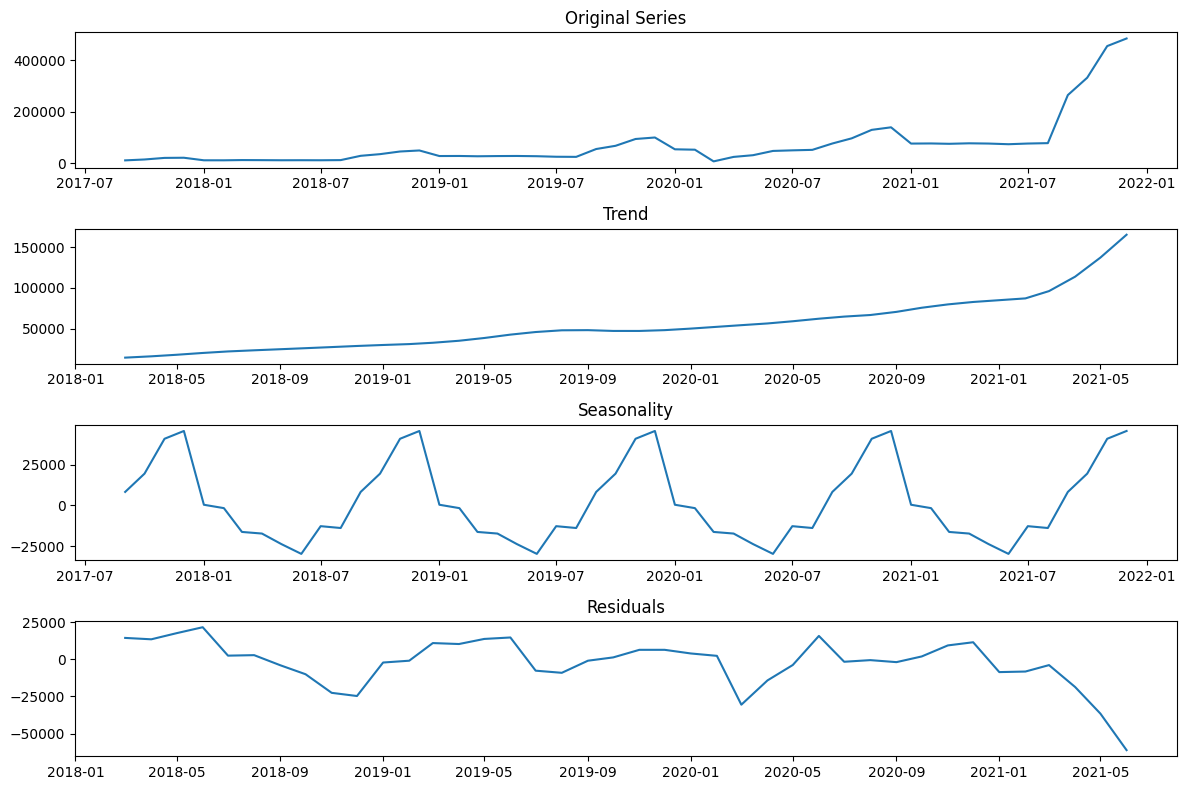

In [56]:
# Identify the seasonality of trends in sales of product over time.
from statsmodels.tsa.seasonal import seasonal_decompose


# Resample the data to monthly frequency and sum the sales for each month
monthly_sales = sales_customer_product['sold_quantity'].resample('MS').sum()

# Decompose the time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot the components
plt.figure(figsize=(12, 8))

# Orginal series plot
plt.subplot(411)
plt.plot(monthly_sales, label='Original')
plt.title('Original Series')

# Trend plot
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend')

# Seasonality plot
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.title('Seasonality')

# Risduals plot
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.title('Residuals')

plt.tight_layout()
plt.show()

> - The seasonal decomposition analysis breaks down the original time series data into three main components: trend, seasonality, and residuals. 
> - <u>Original Series</u>: This is the original time series data, which represents the monthly sales quantity of products over time.
> - <u>Trend</u>: The trend component represents the underlying long-term direction of the sales data, smoothing out short-term fluctuations or noise. It shows the sales are increasing over time.
> - <u>Seasonality</u>: The seasonality component captures the repetitive, periodic patterns or cycles in the sales data that occur at fixed intervals. Seasonality indicates the presence of systematic variations that are predictable and can be attributed to factors like seasonal promotions, holidays, or changes in consumer behavior. This graph shows there is consistent spikes leading towards a new year and then sales drops back down. 
> - Analyzing the trend and seasonality can help you understand the overall behavior of sales over time and identify any recurring patterns or cycles, which can be useful for forecasting future sales and making business decisions.
> - <u>Residuals</u>: The residual component represents the remaining variation in the sales data after removing the trend and seasonal components. It captures random fluctuations or noise that cannot be explained by the trend or seasonality. Residuals ideally should be random and exhibit no patterns, indicating that the trend and seasonality have been effectively accounted for.

In [57]:
# Reset 'date' column to a regular column
sales_customer_product.reset_index(inplace=True)

sales_customer_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67250 entries, 0 to 67249
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           67250 non-null  datetime64[ns]
 1   product_code   67250 non-null  object        
 2   fiscal_year    67250 non-null  int64         
 3   gross_price    67250 non-null  float64       
 4   customer_code  67250 non-null  object        
 5   sold_quantity  67250 non-null  float64       
 6   customer       67250 non-null  object        
 7   platform       67250 non-null  object        
 8   channel        67250 non-null  object        
 9   market         67250 non-null  object        
 10  sub_zone       67250 non-null  object        
 11  region         67250 non-null  object        
 12  division       67250 non-null  object        
 13  segment        67250 non-null  object        
 14  category       67250 non-null  object        
 15  product        6725

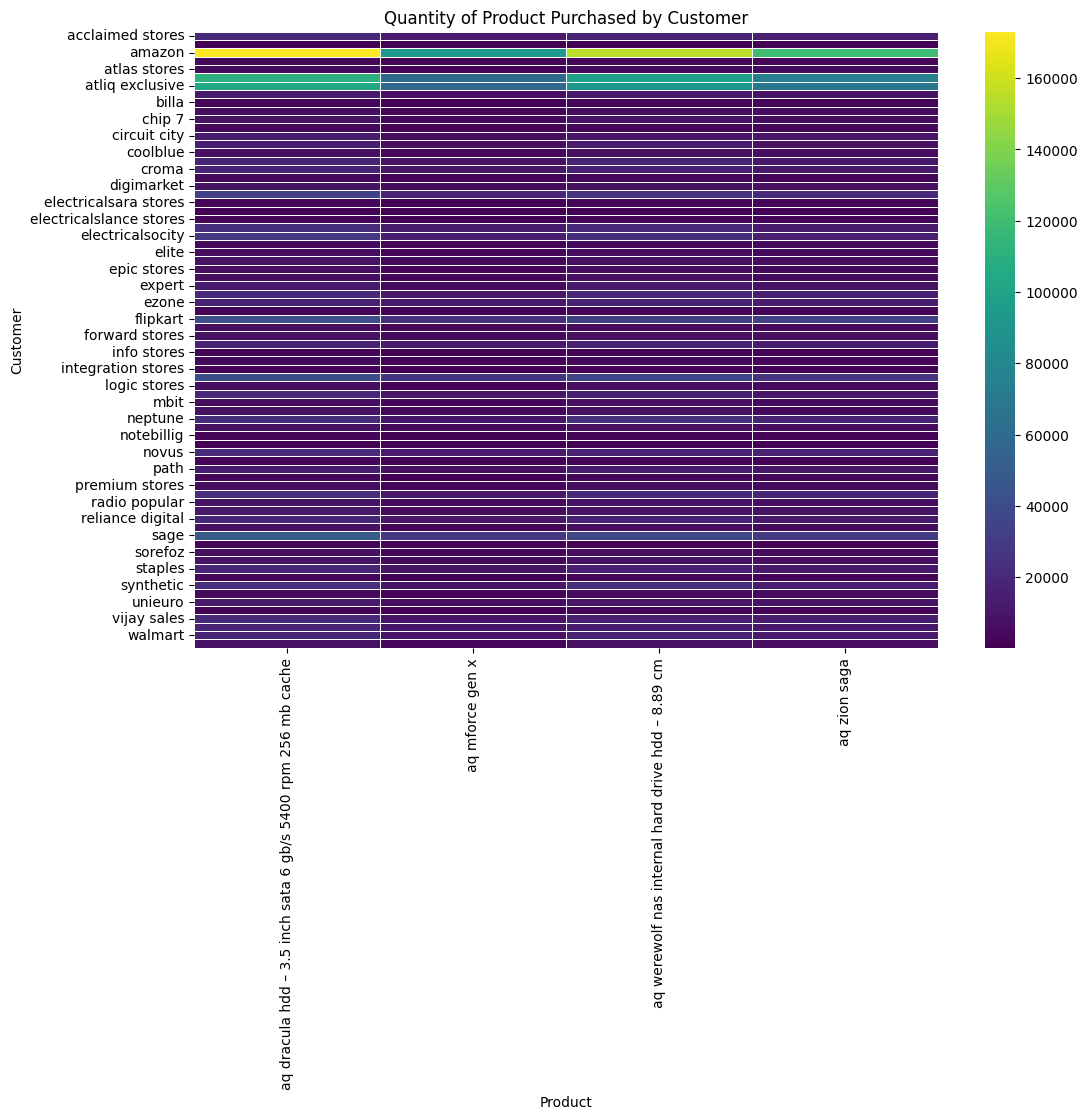

In [58]:
# Analyze per order quantity per unique customer


# Pivot the DataFrame to create a matrix where rows represent customers, columns represent products, and values represent quantity
quantity_matrix = sales_customer_product.pivot_table(index='customer', columns='product', values='sold_quantity', aggfunc='sum', fill_value=0)

# Visualize the quantity matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(quantity_matrix, cmap='viridis', linecolor='white', linewidths=0.5)
plt.title('Quantity of Product Purchased by Customer')
plt.xlabel('Product')
plt.ylabel('Customer')
plt.show()


> - <u>Quantity of Product Purchased by Customer</u>: Amazon and Atliq Exclusive have the most frequent purchases for product called "aq dracula hdd - 3.5inch stat 6gb/s 5400rpm 256mb cache" followed by " aq werewolf nas internal hard drive hdd - 8.89cm". 

In [59]:
# Analyze average order quanitity


# Calculate total order quantity for each transaction
total_order_quantity = sales_customer_product['sold_quantity'].sum()

# Calculate the number of transactions
total_transactions = sales_customer_product.shape[0]

# Calculate average order quantity
average_order_quantity = total_order_quantity / total_transactions

print("Average Order Quantity:", average_order_quantity)


Average Order Quantity: 56.25182156133829


In [60]:
# Analyze average order price


# Calculate total order value for each transaction
sales_customer_product['order_price'] = sales_customer_product['sold_quantity'] * sales_customer_product['gross_price']

# Calculate average order value
average_order_price = sales_customer_product['order_price'].mean()

print("Average Order Price:", average_order_price)


Average Order Price: 1287.0767146334574


Most Profitable Product:
product          aq werewolf nas internal hard drive hdd – 8.89 cm
total_revenue                                        26003959.6767
Name: 2, dtype: object

Least Profitable Product:
product          aq mforce gen x
total_revenue      12099575.3137
Name: 1, dtype: object


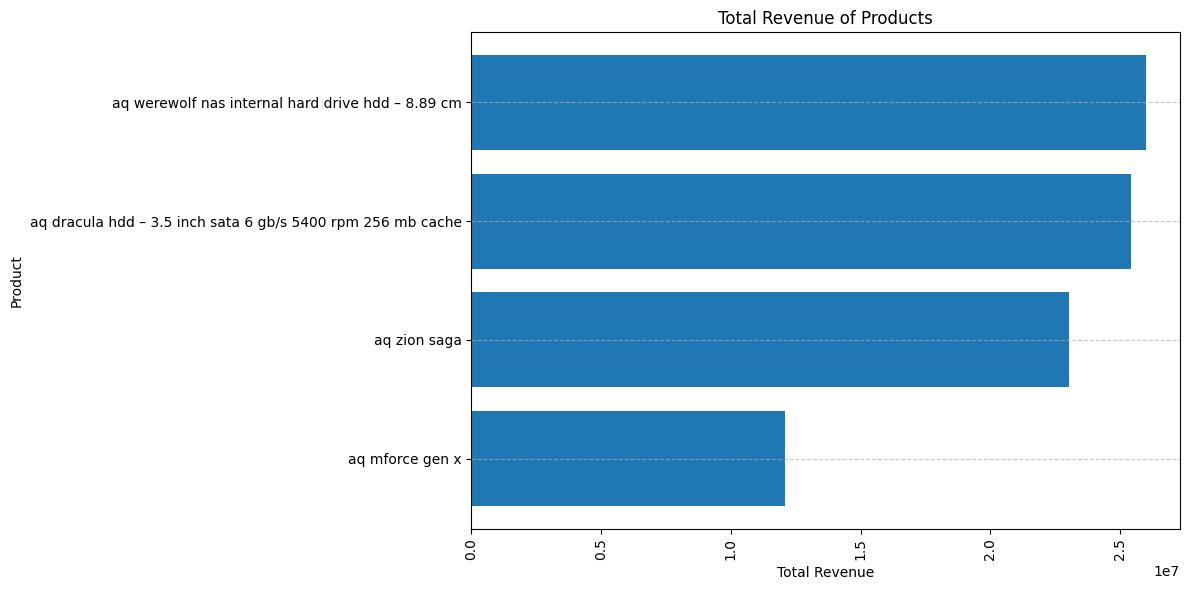

In [61]:
# Purchase behavior:
# What product make the most and least money?


# Calculate total revenue for each product
sales_customer_product['total_revenue'] = sales_customer_product['sold_quantity'] * sales_customer_product['gross_price']

# Group data by product and sum total revenue
total_revenue_by_product = sales_customer_product.groupby('product')['total_revenue'].sum().reset_index()

# Find the product with the highest total revenue
most_profitable_product = total_revenue_by_product.loc[total_revenue_by_product['total_revenue'].idxmax()]
print("Most Profitable Product:")
print(most_profitable_product)

print('')

# Find the product with the lowest total revenue
least_profitable_product = total_revenue_by_product.loc[total_revenue_by_product['total_revenue'].idxmin()]
print("Least Profitable Product:")
print(least_profitable_product)



# Sort products by total revenue in descending order
total_revenue_by_product = total_revenue_by_product.sort_values(by='total_revenue', ascending=True)

# Visualize the total revenue of products
plt.figure(figsize=(12, 6))
plt.barh(total_revenue_by_product['product'], total_revenue_by_product['total_revenue'])
plt.title('Total Revenue of Products')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> <u>Total Revenue of Products</u>: "aq werewolf nas internal hard drive hdd - 8.89cm" generates the most revenue per product. 

Product with the Highest Net Profit:
product       aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache
net_profit                                                    352123.2813
Name: 0, dtype: object

Product with the Lowest Net Profit:
product       aq zion saga
net_profit      169572.531
Name: 3, dtype: object


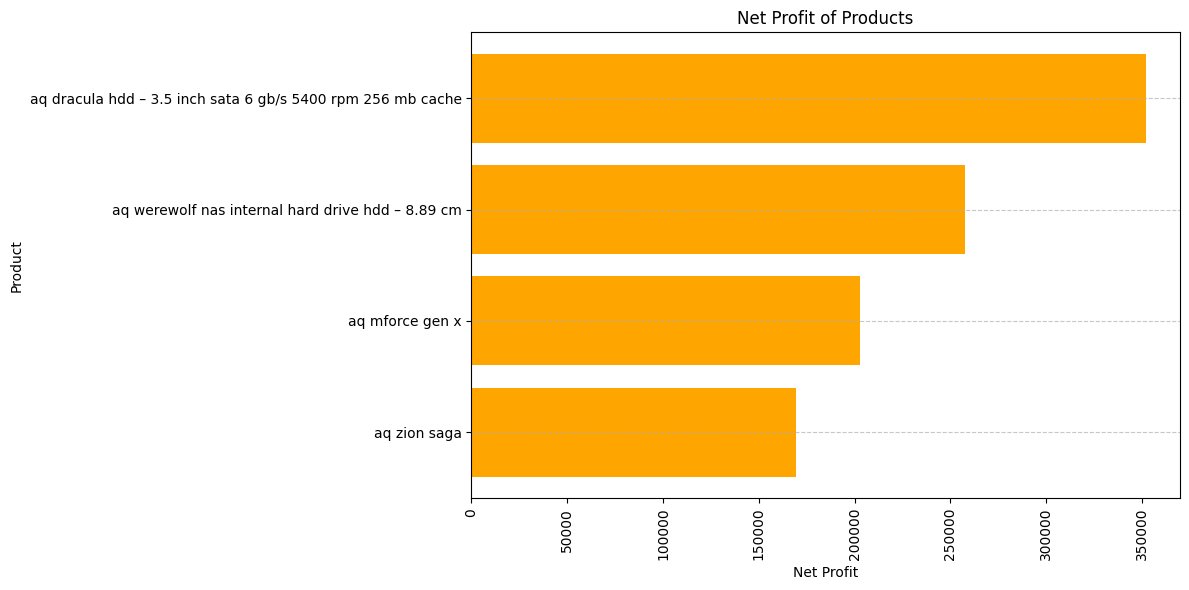

In [62]:
# Which product has the highest net profit = gross price - manufacturing cost




# Calculate net profit for each product
sales_customer_product_cost['net_profit'] = sales_customer_product_cost['gross_price'] - sales_customer_product_cost['manufacturing_cost']

# Group data by product and sum the net profit
total_net_profit_by_product = sales_customer_product_cost.groupby('product')['net_profit'].sum().reset_index()

# Find the product with the highest net profit
highest_profit_product = total_net_profit_by_product.loc[total_net_profit_by_product['net_profit'].idxmax()]
print("Product with the Highest Net Profit:")
print(highest_profit_product)

print('')

# Find the product with the lowest net profit
lowest_profit_product = total_net_profit_by_product.loc[total_net_profit_by_product['net_profit'].idxmin()]
print("Product with the Lowest Net Profit:")
print(lowest_profit_product)


# Sort products by net profit in descending order
total_net_profit_by_product = total_net_profit_by_product.sort_values(by='net_profit', ascending=True)

# Visualize the net profit of products
plt.figure(figsize=(12, 6))
plt.barh(total_net_profit_by_product['product'], total_net_profit_by_product['net_profit'], color='orange')
plt.title('Net Profit of Products')
plt.xlabel('Net Profit')
plt.ylabel('Product')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

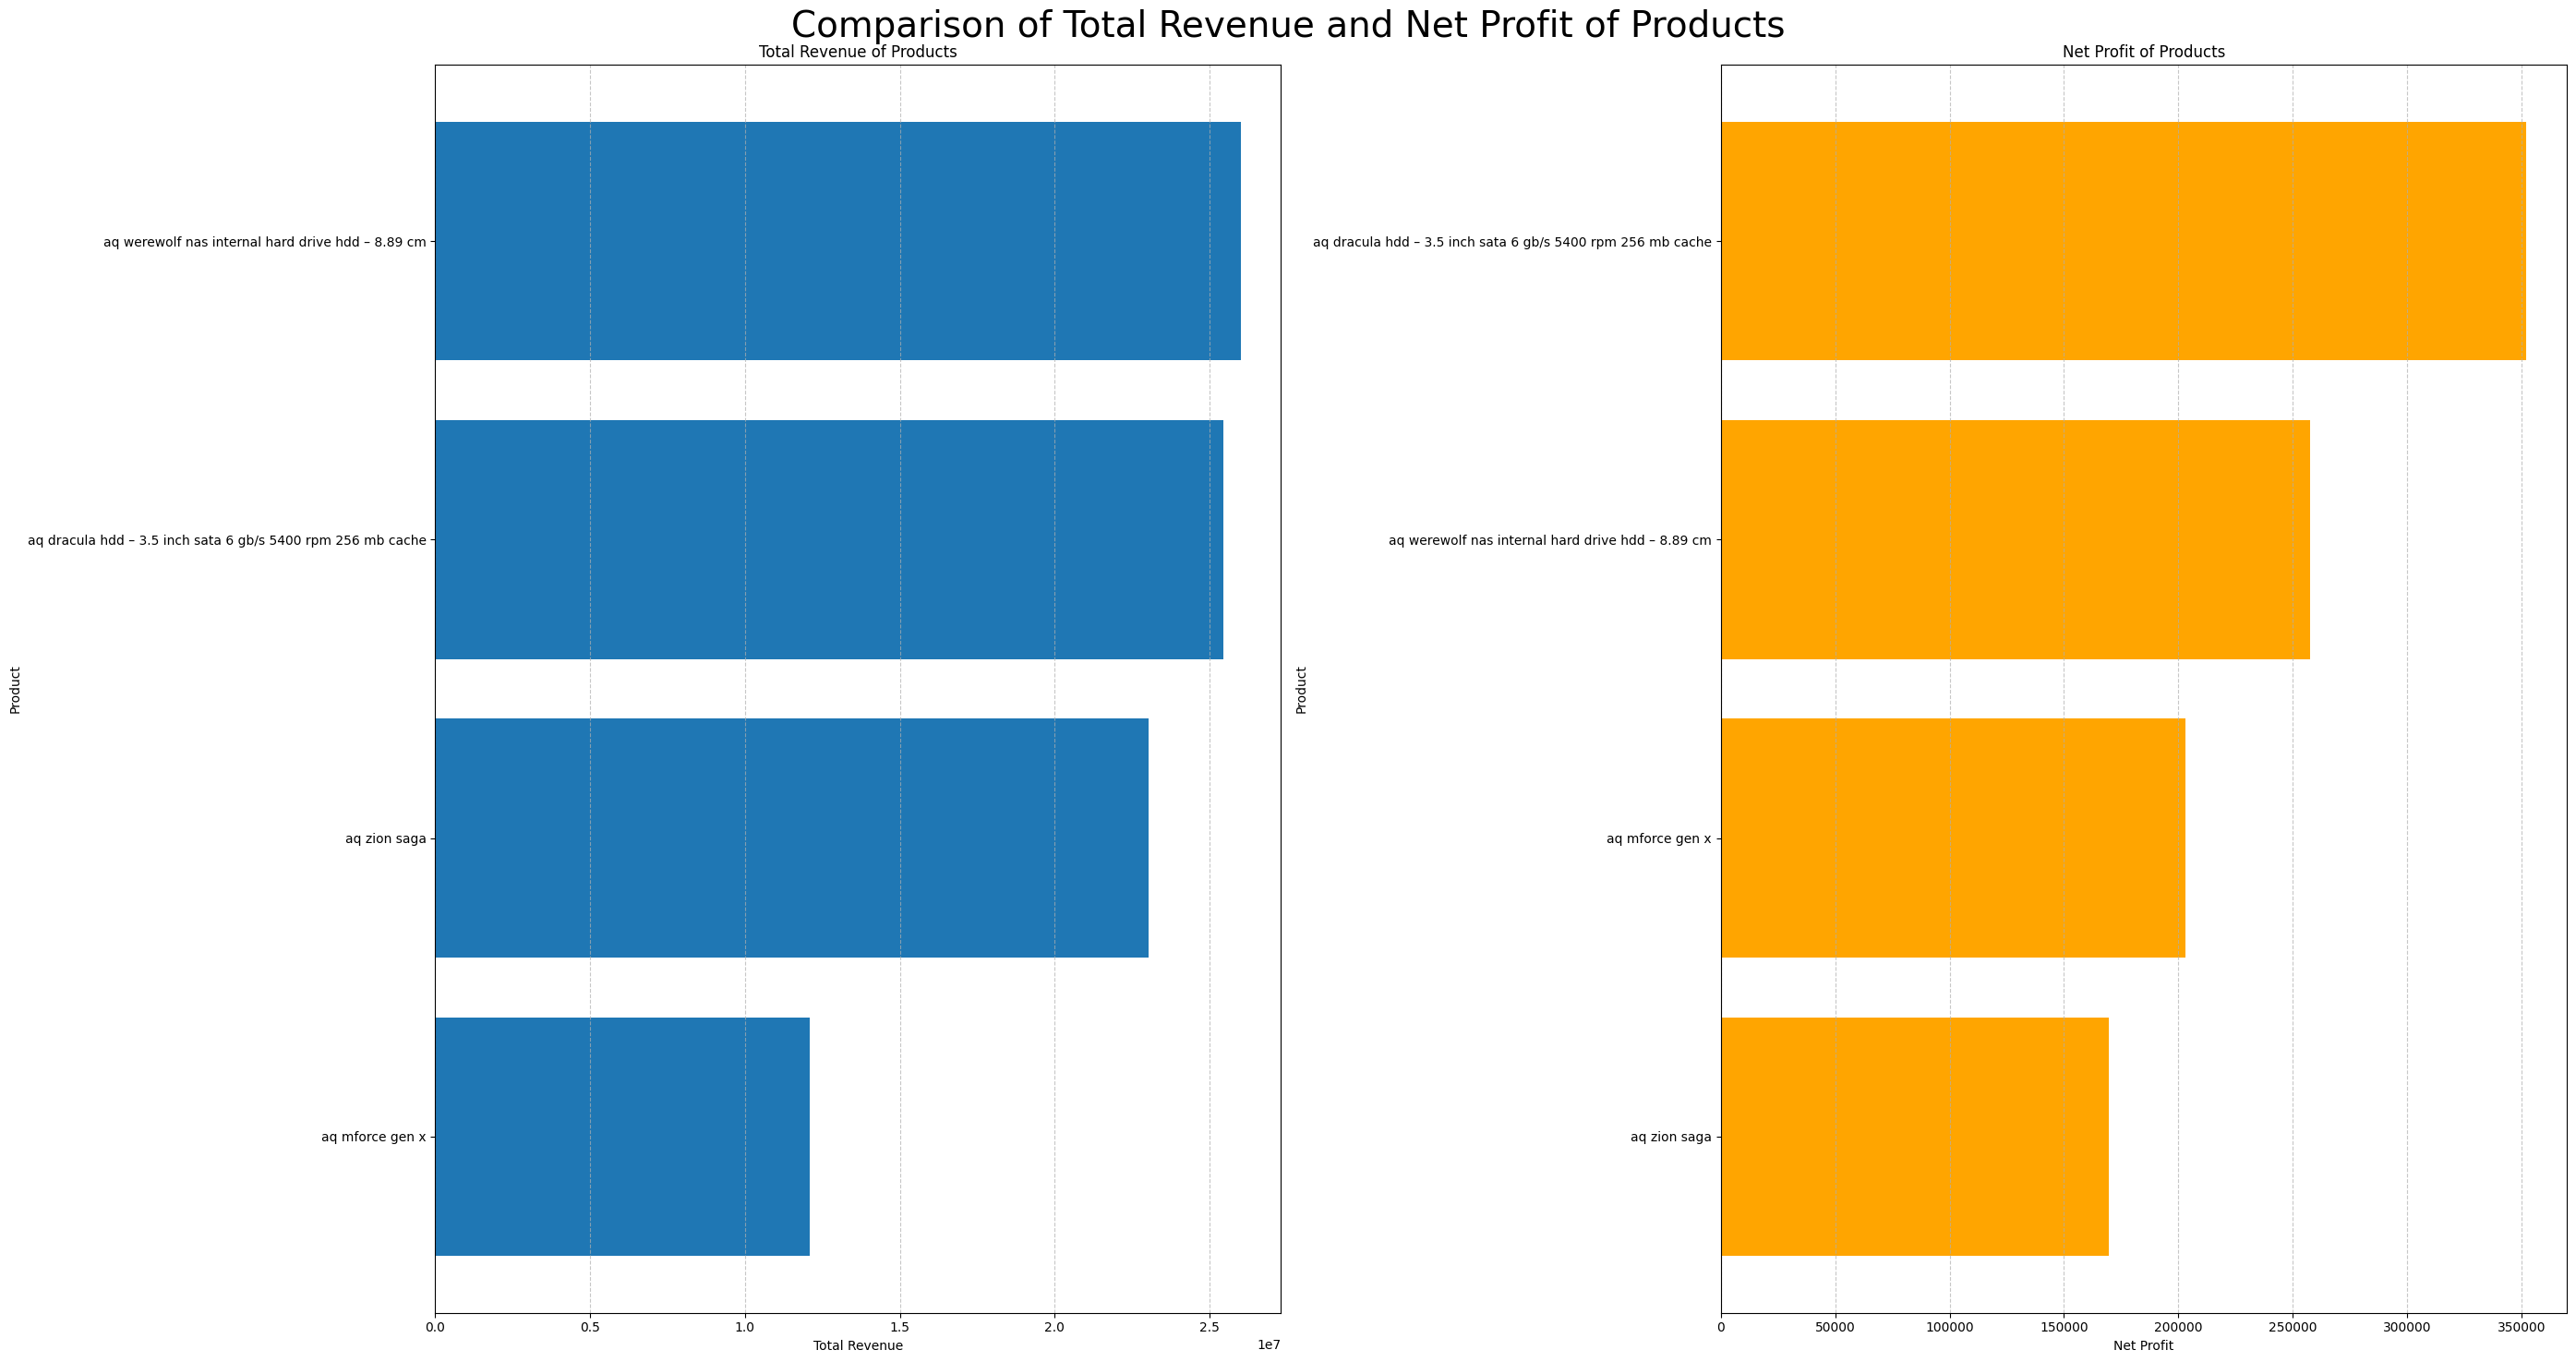

In [63]:
# Compare Total Revenue to New Profit of Products


# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 15))

# Plot total revenue
ax1.barh(total_revenue_by_product['product'], total_revenue_by_product['total_revenue'])
ax1.set_title('Total Revenue of Products')
ax1.set_xlabel('Total Revenue')
ax1.set_ylabel('Product')
ax1.tick_params(axis='y', rotation=0)  # Rotate y-axis labels for better readability
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Plot net profit
ax2.barh(total_net_profit_by_product['product'], total_net_profit_by_product['net_profit'], color='orange')
ax2.set_title('Net Profit of Products')
ax2.set_xlabel('Net Profit')
ax2.set_ylabel('Product')
ax2.tick_params(axis='y', rotation=0)  # Rotate y-axis labels for better readability
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Set a title above the subplots
fig.suptitle('Comparison of Total Revenue and Net Profit of Products', fontsize=28)


plt.tight_layout()
plt.show()

> - <u>Comparsion of Total Revenue and Net Profit of Products</u>: The highest revenue profit does not produce the highest net profit.

/var/folders/60/8q5wzm254t14259k67df5fy40000gn/T/ipykernel_1798/3093024274.py:10: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = most_profitable_product_per_market.groupby('market')['gross_price'].transform(max) == most_profitable_product_per_market['gross_price']


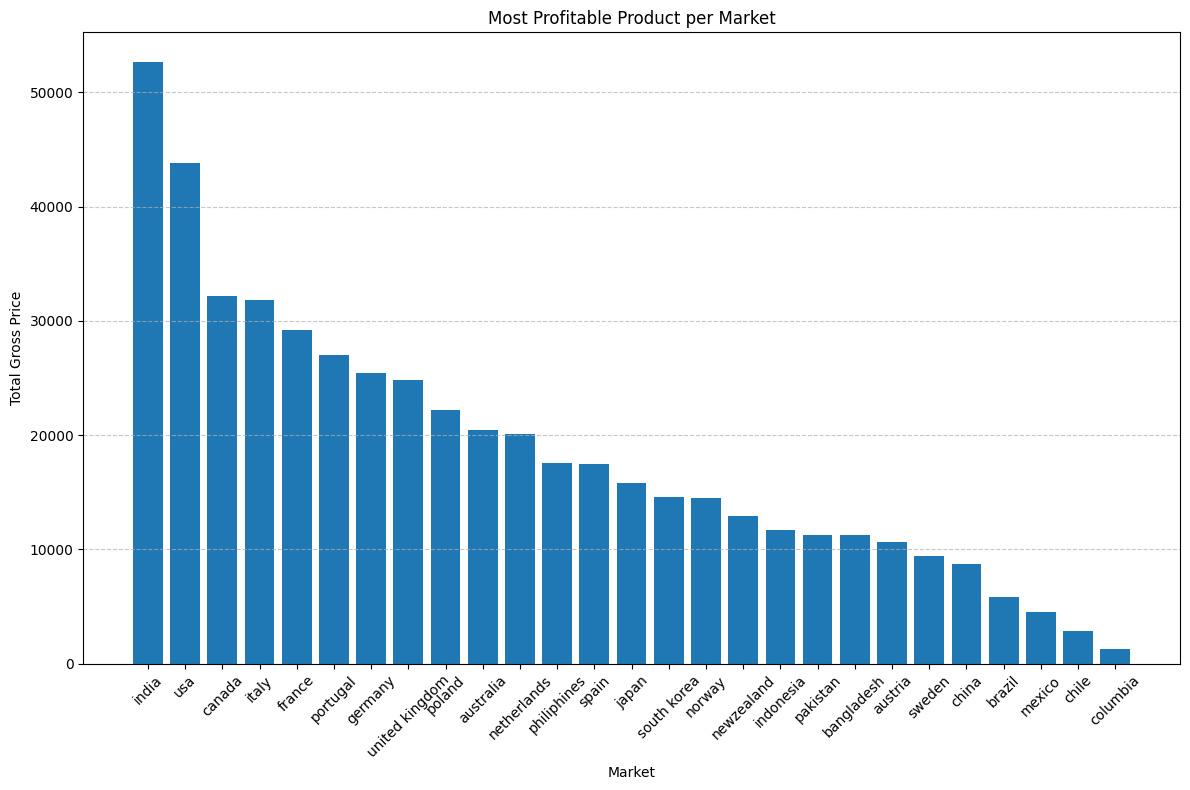

In [64]:
# Feature usage:
# What product makes the most money per market



# Group by market and product, then calculate the sum of gross price for each product within each market
most_profitable_product_per_market = sales_customer_product_cost.groupby(['market', 'product'])['gross_price'].sum().reset_index()

# For each market, find the product with the highest sum of gross price
idx = most_profitable_product_per_market.groupby('market')['gross_price'].transform(max) == most_profitable_product_per_market['gross_price']
most_profitable_product_per_market = most_profitable_product_per_market[idx]


# Sort in decsending order
most_profitable_product_per_market_sorted = most_profitable_product_per_market.sort_values(by='gross_price', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(most_profitable_product_per_market_sorted['market'], most_profitable_product_per_market_sorted['gross_price'])
plt.xlabel('Market')
plt.ylabel('Total Gross Price')
plt.title('Most Profitable Product per Market')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


> - <u>Most Profitable Product per Market</u>: India creates the most profit in the market and Columbia the least amount of profit.

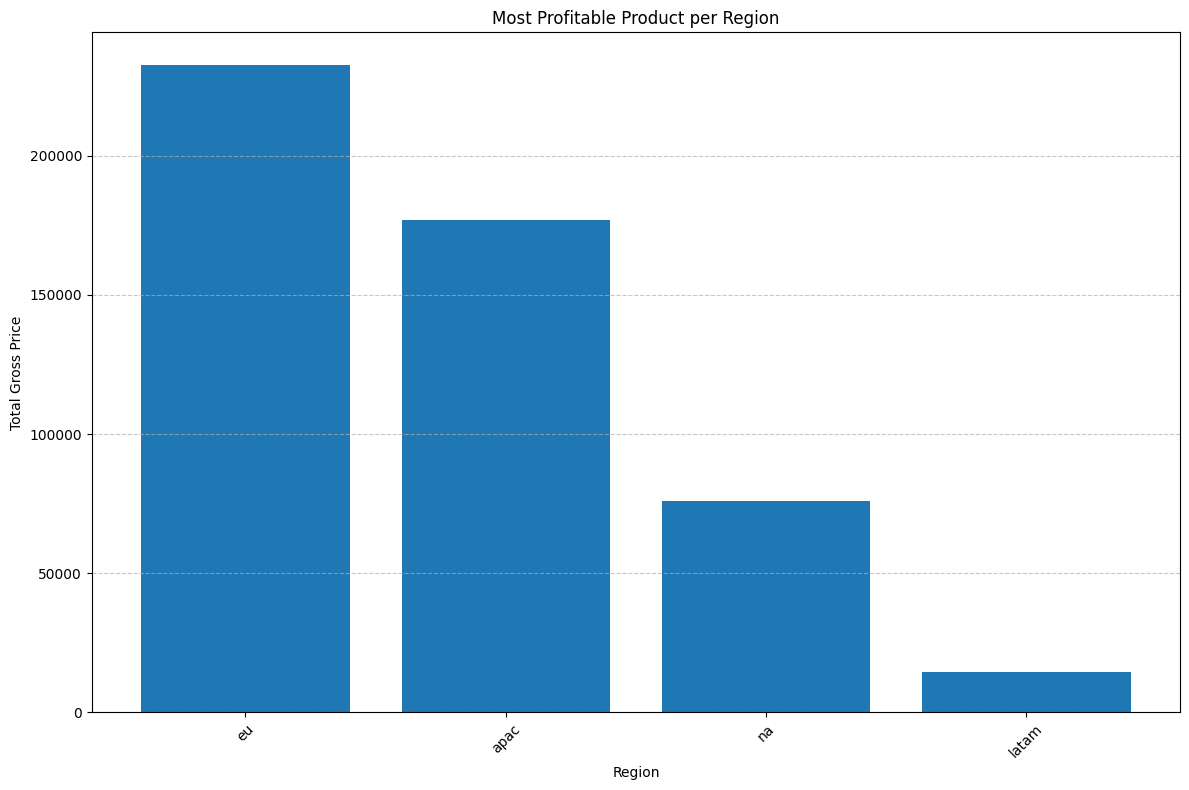

In [65]:
# What product makes the most money per region

# Group by region and product, then calculate the sum of gross price for each product within each region
most_profitable_product_per_region = sales_customer_product_cost.groupby(['region', 'product'])['gross_price'].sum().reset_index()

# For each region, find the product with the highest sum of gross price
idx = most_profitable_product_per_region.groupby('region')['gross_price'].transform("max") == most_profitable_product_per_region['gross_price']
most_profitable_product_per_region = most_profitable_product_per_region[idx]

# Sort in descending order by gross price
most_profitable_product_per_region_sorted = most_profitable_product_per_region.sort_values(by='gross_price', ascending=False)


plt.figure(figsize=(12, 8))
plt.bar(most_profitable_product_per_region_sorted['region'], most_profitable_product_per_region_sorted['gross_price'])
plt.xlabel('Region')
plt.ylabel('Total Gross Price')
plt.title('Most Profitable Product per Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/60/8q5wzm254t14259k67df5fy40000gn/T/ipykernel_1798/2746041811.py:8: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = most_profitable_product_per_channel.groupby('channel')['gross_price'].transform(max) == most_profitable_product_per_channel['gross_price']


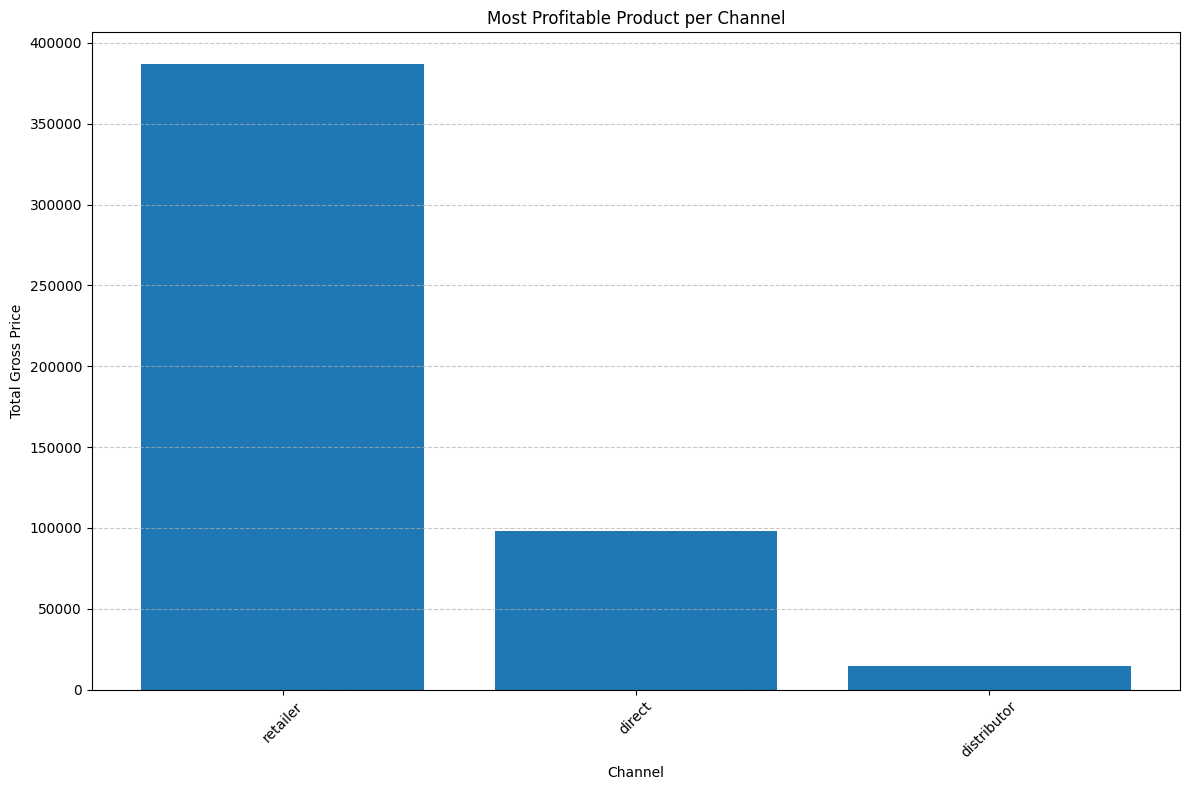

In [66]:
# What product makes the most money per channel


# Group by channel and product, then calculate the sum of gross price for each product within each channel
most_profitable_product_per_channel = sales_customer_product_cost.groupby(['channel', 'product'])['gross_price'].sum().reset_index()

# For each channel, find the product with the highest sum of gross price
idx = most_profitable_product_per_channel.groupby('channel')['gross_price'].transform(max) == most_profitable_product_per_channel['gross_price']
most_profitable_product_per_channel = most_profitable_product_per_channel[idx]

# Sort in descending order by gross price
most_profitable_product_per_channel_sorted = most_profitable_product_per_channel.sort_values(by='gross_price', ascending=False)


plt.figure(figsize=(12, 8))
plt.bar(most_profitable_product_per_channel_sorted['channel'], most_profitable_product_per_channel_sorted['gross_price'])
plt.xlabel('Channel')
plt.ylabel('Total Gross Price')
plt.title('Most Profitable Product per Channel')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


_____

<h1> Customer Analysis </h1>

> - Customer & Market Research

In [67]:
display(dim_customer)

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,atliq exclusive,brick & mortar,direct,india,india,apac
1,70002018,atliq e store,e-commerce,direct,india,india,apac
2,70003181,atliq exclusive,brick & mortar,direct,indonesia,roa,apac
3,70003182,atliq e store,e-commerce,direct,indonesia,roa,apac
4,70004069,atliq exclusive,brick & mortar,direct,japan,roa,apac
...,...,...,...,...,...,...,...
204,90024183,electricalsbea stores,brick & mortar,retailer,chile,latam,latam
205,90024184,amazon,e-commerce,retailer,chile,latam,latam
206,90025209,electricalsbea stores,brick & mortar,retailer,columbia,latam,latam
207,90026205,amazon,e-commerce,retailer,mexico,latam,latam


In [68]:
# metrics found during data preprocessing

print('Number of customers:', num_customers)
print('')
print('Customer Codes to each Customer:', customer_code_count) # 'customer_code' is the unique identifer of customer. one customer can have multiple cusomter_code

Number of customers: 74

Customer Codes to each Customer: customer
acclaimed stores        2
all-out                 1
amazon                  4
amazon                 25
argos (sainsbury's)     3
                       ..
unity stores            1
vijay sales             1
viveks                  1
walmart                 2
zone                    2
Name: customer_code, Length: 75, dtype: int64


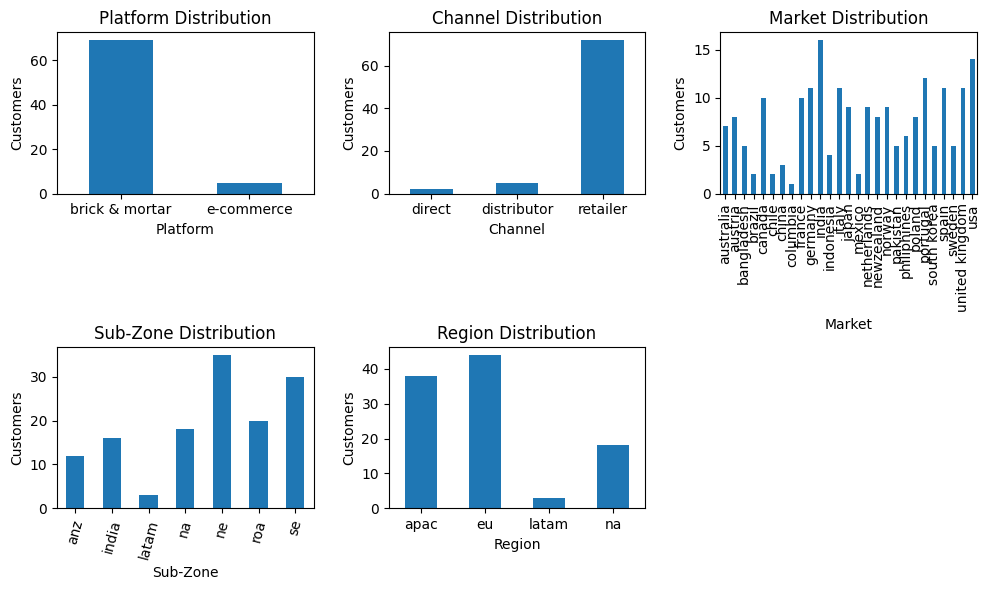

In [69]:
# Customer Segementation Analysis:
# analyze the distribution of customers across different platforms, channels, markets, sub-zones, and regions. 
# this metric can help identify which platforms, channels, and regions have the highest customer concentration.


# Group the data by each dimension
platform_distribution = dim_customer.groupby('platform')['customer'].nunique()
channel_distribution = dim_customer.groupby('channel')['customer'].nunique()
market_distribution = dim_customer.groupby('market')['customer'].nunique()
sub_zone_distribution = dim_customer.groupby('sub_zone')['customer'].nunique()
region_distribution = dim_customer.groupby('region')['customer'].nunique()

# Visualize the distribution of customers across different dimensions
plt.figure(figsize=(10, 6))


# Platform distribution
plt.subplot(2, 3, 1)
platform_distribution.plot(kind='bar', rot=0)
plt.title('Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Customers')

# Channel distribution
plt.subplot(2, 3, 2)
channel_distribution.plot(kind='bar', rot=0)
plt.title('Channel Distribution')
plt.xlabel('Channel')
plt.ylabel('Customers')

# Market distribution
plt.subplot(2, 3, 3)
market_distribution.plot(kind='bar', rot=90)
plt.title('Market Distribution')
plt.xlabel('Market')
plt.ylabel('Customers')

# Sub-zone distribution
plt.subplot(2, 3, 4)
sub_zone_distribution.plot(kind='bar', rot=75)
plt.title('Sub-Zone Distribution')
plt.xlabel('Sub-Zone')
plt.ylabel('Customers')

# Region distribution
plt.subplot(2, 3, 5)
region_distribution.plot(kind='bar', rot=0)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Customers')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Customers')

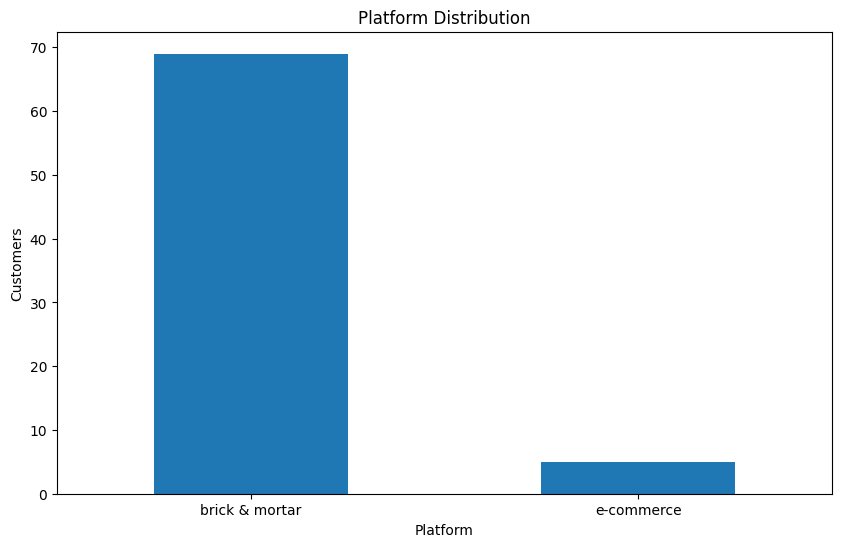

In [70]:
# Visualization of the distribution of customers across different platforms
plt.figure(figsize=(10, 6))
platform_distribution.plot(kind='bar', rot=0)
plt.title('Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Customers')

> - <u>Platform Distrubution</u>: majority of customers use brick & mortar as their platform than e-commerce. 

Text(0, 0.5, 'Customers')

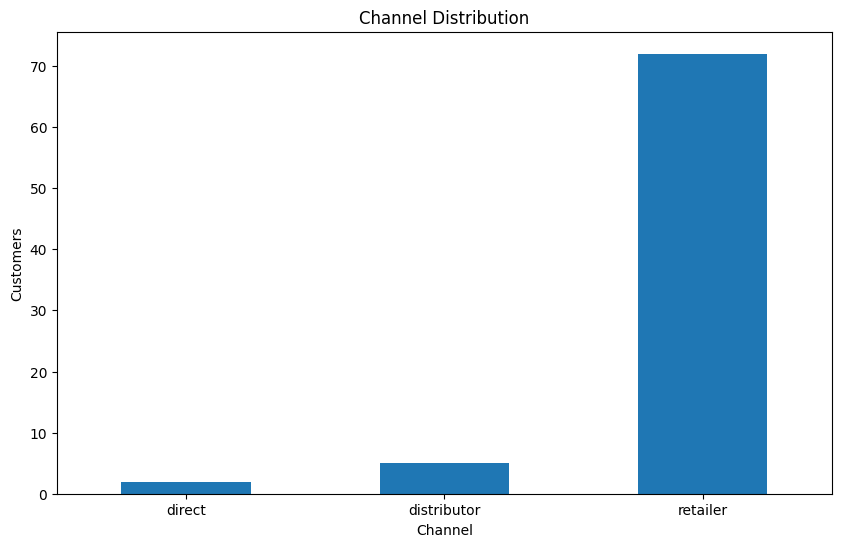

In [71]:
# Visualization of the distribution of customers across different channels
plt.figure(figsize=(10, 6))
channel_distribution.plot(kind='bar', rot=0)
plt.title('Channel Distribution')
plt.xlabel('Channel')
plt.ylabel('Customers')

> - <u>Channel Distribution</u>: majority of customers purchase their products through a retailer than through other forms. 

Text(0, 0.5, 'Customers')

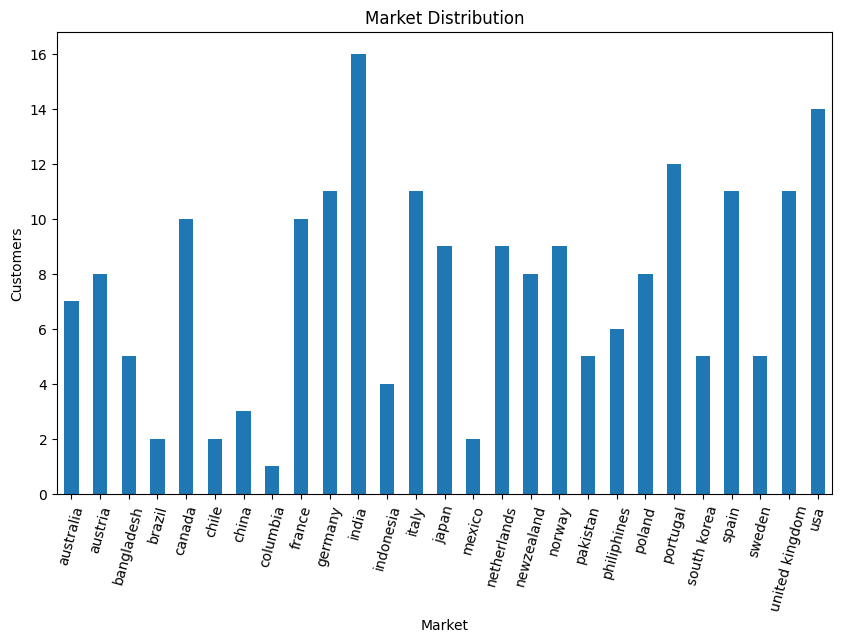

In [72]:
# Visualization of the distribution of customers across different markets
plt.figure(figsize=(10, 6))
market_distribution.plot(kind='bar', rot=75)
plt.title('Market Distribution')
plt.xlabel('Market')
plt.ylabel('Customers')

> - <code>'market'</code> stands for the country of the customer's office.
> - <u>Market Distribution</u>: many customers choose their office in India and USA, whereas Columbia has the least amount out of all other markets.  

Text(0, 0.5, 'Customers')

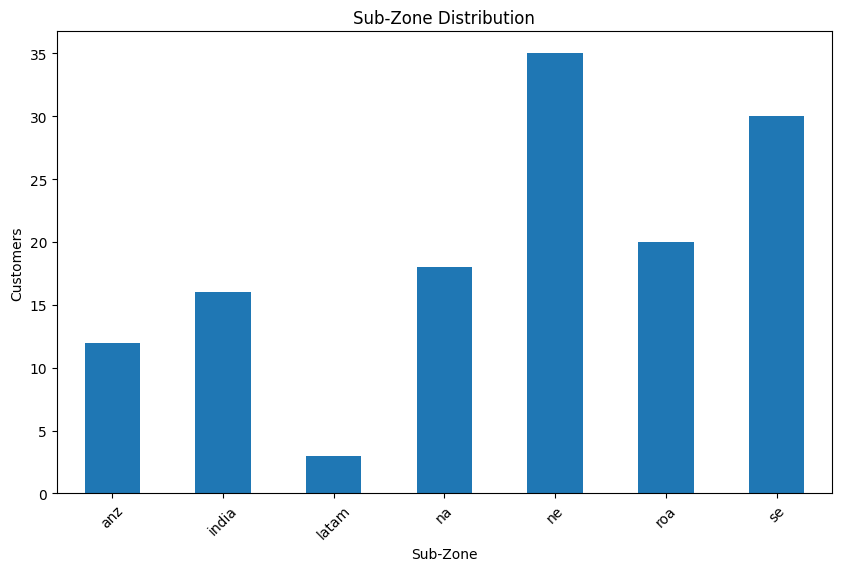

In [73]:
# Visualization of the distribution of customers across different sub-zones
plt.figure(figsize=(10, 6))
sub_zone_distribution.plot(kind='bar', rot=45)
plt.title('Sub-Zone Distribution')
plt.xlabel('Sub-Zone')
plt.ylabel('Customers')

> - <code>'sub_zone'</code> stands for the abbreviations of the region. For one market there should be one sub_zone. 
> - <u>Sub-Zone Distribution</u>: there seems to be many markets located in NE followed by SE even though in the 'Market Distribution' plot, the most markets is India.

Text(0, 0.5, 'Customers')

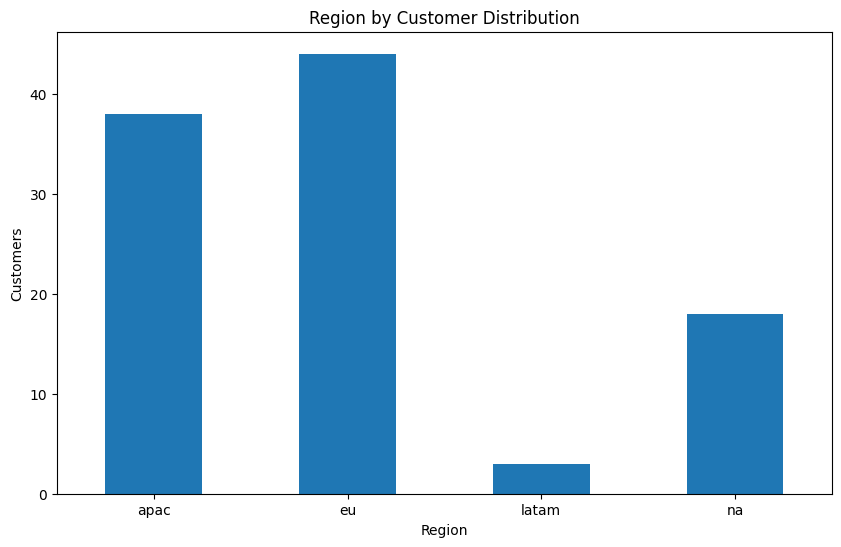

In [74]:
# Visualization of the distribution of customers across different regions
plt.figure(figsize=(10, 6))
region_distribution.plot(kind='bar', rot=0)
plt.title('Region by Customer Distribution')
plt.xlabel('Region')
plt.ylabel('Customers')

> - <code>'region'</code> stands for the region where the customer's office is located. For one market there should be one region. 
> - <u>Region Distribution</u>: EU has the highest markets in the region. 

In [75]:
# Market Penetration Anlaysis:
# Identify which markets have the highest and lowest customer presence.



# Group the data by market and count the number of unique customers
market_penetration = dim_customer.groupby('market')['customer'].nunique()

# Sort the market penetration data in descending order
market_penetration_sorted = market_penetration.sort_values(ascending=False)

# Print the market penetration data
print("Market Penetration Analysis:")
print(market_penetration_sorted)

# Identify markets with the highest and lowest presence
highest_presence_market = market_penetration_sorted.idxmax()
lowest_presence_market = market_penetration_sorted.idxmin()

print("\nMarket with the Highest Customer Presence:", highest_presence_market)
print("Market with the Lowest Customer Presence:", lowest_presence_market)


Market Penetration Analysis:
market
india             16
usa               14
portugal          12
italy             11
united kingdom    11
spain             11
germany           11
canada            10
france            10
norway             9
netherlands        9
japan              9
austria            8
newzealand         8
poland             8
australia          7
philiphines        6
pakistan           5
south korea        5
sweden             5
bangladesh         5
indonesia          4
china              3
mexico             2
chile              2
brazil             2
columbia           1
Name: customer, dtype: int64

Market with the Highest Customer Presence: india
Market with the Lowest Customer Presence: columbia


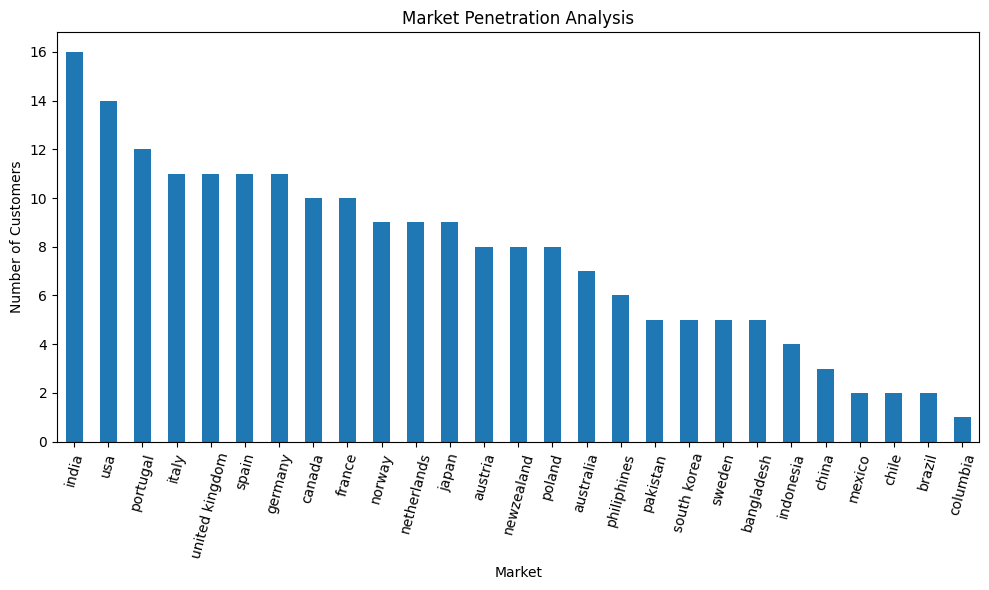

In [76]:
# Plotting the market penetration
plt.figure(figsize=(10, 6))
market_penetration_sorted.plot(kind='bar')
plt.title('Market Penetration Analysis')
plt.xlabel('Market')
plt.ylabel('Number of Customers')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

> - <u>Market Penetration Analysis</u>: India has the highest customer presence whereas Columbia has the least.

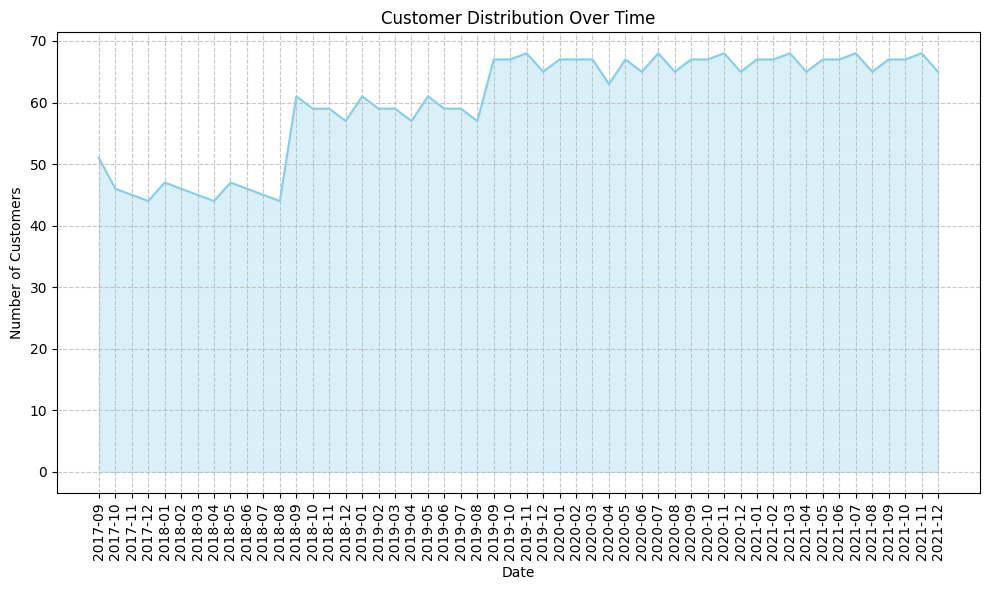

In [77]:
# Trend Analysis:
# Track changes in customer distribution over time to identify emerging trends or patterns in customer behavior.



# Convert 'date' column to datetime
sales_customer['date'] = pd.to_datetime(sales_customer['date'])

# Group data by time (e.g., month)
customer_distribution_over_time = sales_customer.groupby(sales_customer['date'].dt.to_period('M')).agg({'customer': 'nunique'})

# Visualize trends over time
plt.figure(figsize=(10, 6))
plt.plot(customer_distribution_over_time.index.astype(str), customer_distribution_over_time['customer'], color='skyblue')
plt.fill_between(customer_distribution_over_time.index.astype(str), customer_distribution_over_time['customer'], color='skyblue', alpha=0.3)
plt.title('Customer Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> - There is a significant surge in number of customers between August 2018 and August 2019. Following August 2019, customer figures stabilized without major fluctuations.

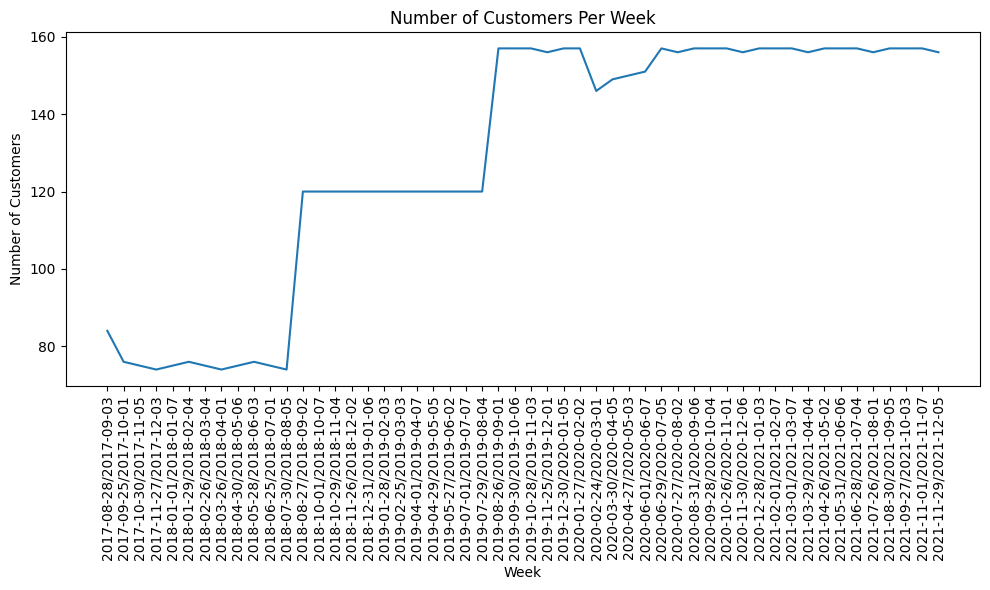

In [78]:
# How many customers purchased items weekly, monthly, yearly?

# extract year-month from 'date'
sales_customer['week'] = sales_customer['date'].dt.to_period('W').astype(str) 
# added ".astype(str)" after "dt.to_period('M')" to convert 'Period' object to string, making it JSON serializable and resolving the error that you will encounter without it: 'TypeError: Object of type Period is not JSON serializable')

# group by year-month and count the number of unique users
customers_monthly = sales_customer.groupby('week')['customer_code'].nunique().reset_index()

# plot visual with matplotlib
plt.figure(figsize=(10, 6))
plt.plot(customers_monthly['week'], customers_monthly['customer_code'])
plt.xlabel('Week')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Per Week')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> - <u>Number of Customers Per Week</u>: Notable spikes in customer count occurred in the week of August 2018 and August 2019. Between these periods, the graph indicates a plateau, suggesting no influx of new customers during that time.

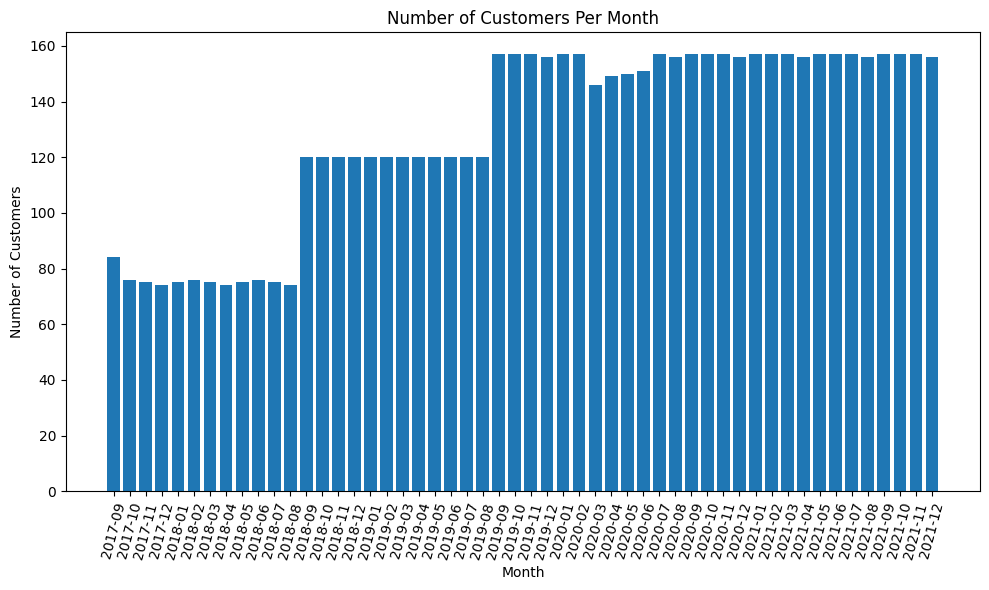

In [79]:
# what is total number of customers each month (12 months)


# extract year-month from 'date'
sales_customer['month'] = sales_customer['date'].dt.to_period('M').astype(str) 
# added ".astype(str)" after "dt.to_period('M')" to convert 'Period' object to string, making it JSON serializable and resolving the error that you will encounter without it: 'TypeError: Object of type Period is not JSON serializable')

# group by year-month and count the number of unique users
customers_monthly = sales_customer.groupby('month')['customer_code'].nunique().reset_index()

# plot visual with matplotlib
plt.figure(figsize=(10, 6))
plt.bar(customers_monthly['month'], customers_monthly['customer_code'])
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Per Month')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

> - <u>Number of Customers Per Month</u>: Significant spikes in customer count occurred after August 2018 and August 2019. The general customer count is steady over each period of time without major fluctuations. 

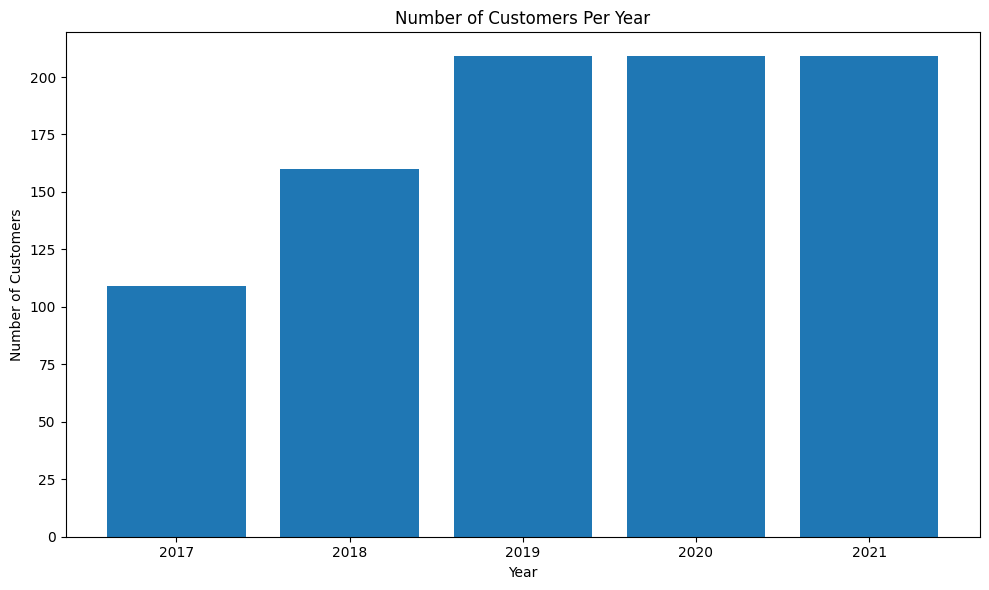

In [80]:
# what is total number of customers each year 


# extract year-month from 'date'
sales_customer['year'] = sales_customer['date'].dt.to_period('Y').astype(str) 
# added ".astype(str)" after "dt.to_period('Y')" to convert 'Period' object to string, making it JSON serializable and resolving the error that you will encounter without it: 'TypeError: Object of type Period is not JSON serializable')

# group by year-month and count the number of unique users
customers_yearly = sales_customer.groupby('year')['customer_code'].nunique().reset_index()

# plot visual with matplotlib
plt.figure(figsize=(10, 6))
plt.bar(customers_yearly['year'], customers_yearly['customer_code'])
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Per Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

> - <u>Number of Customers Per Year</u>: Between 2017 and 2019, there was a steady increase in the number of customers, followed by a plateau, indicating no further growth during that period.

           date             customer  num_purchases
0    2017-09-01     acclaimed stores             16
1    2017-09-01               amazon             56
2    2017-09-01  argos (sainsbury's)             15
3    2017-09-01        atliq e store             78
4    2017-09-01      atliq exclusive             86
...         ...                  ...            ...
3117 2021-12-01         unity stores              9
3118 2021-12-01          vijay sales              9
3119 2021-12-01               viveks              9
3120 2021-12-01              walmart             18
3121 2021-12-01                 zone              9

[3122 rows x 3 columns]


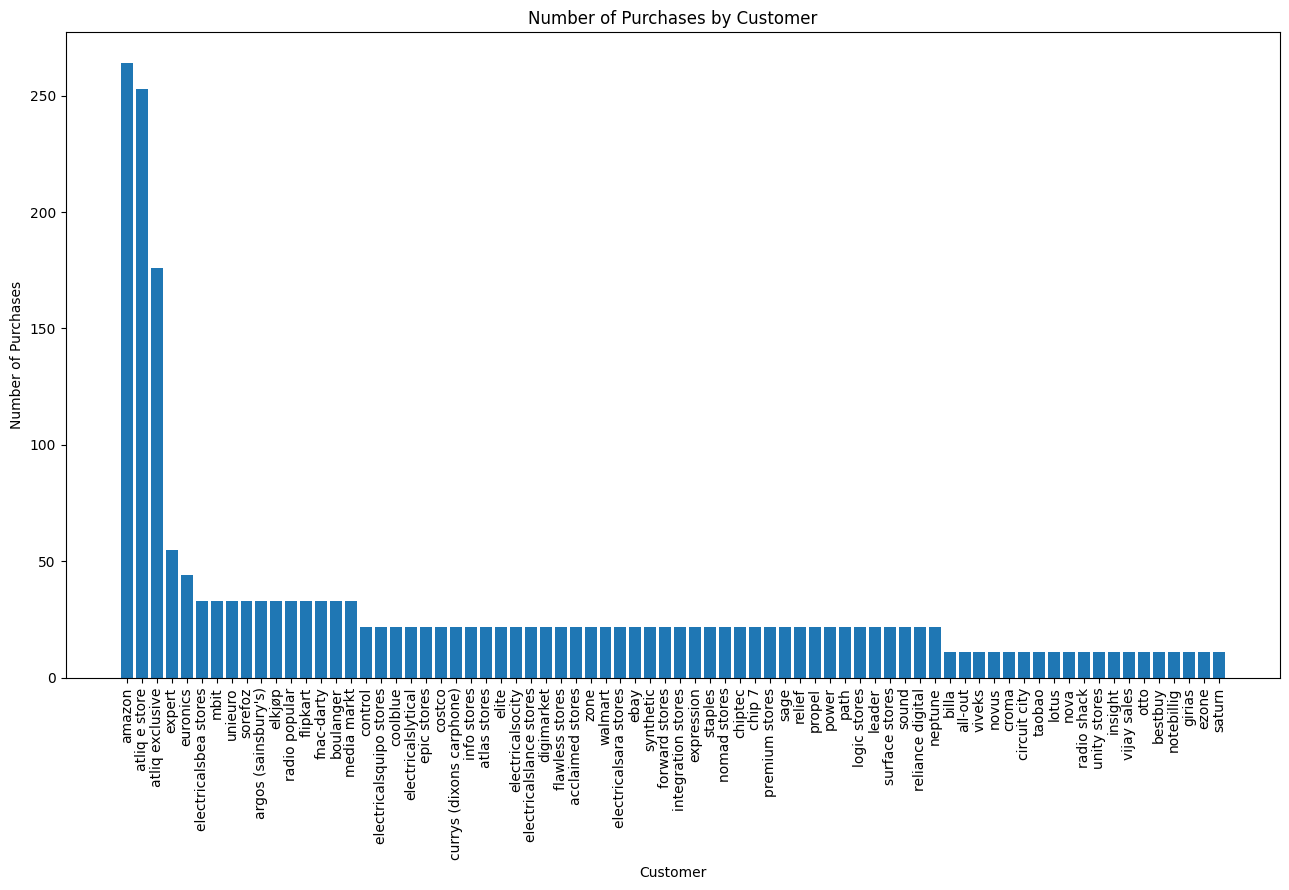

In [81]:
# How many purchases are made by each unique customer?


# Grouping by 'date' and 'customer_code', then counting the number of purchases for each group
purchases_per_day_per_customer = sales_customer.groupby(['date', 'customer']).size().reset_index(name='num_purchases')
print(purchases_per_day_per_customer)

# Sort in descending order
sorted_purchases_per_day_customer = purchases_per_day_per_customer.sort_values(by='num_purchases', ascending=False)

# Plotting the data
plt.figure(figsize=(13, 9))
plt.bar(sorted_purchases_per_day_customer['customer'], sorted_purchases_per_day_customer['num_purchases'])
plt.xlabel('Customer')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Customer')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()




> - Amazon and Atliq E Store has the highest amount of purchases made.

Customer with the most sales: amazon Total Sales: 540219.0
Customer with the least sales: nova Total Sales: 1771.0


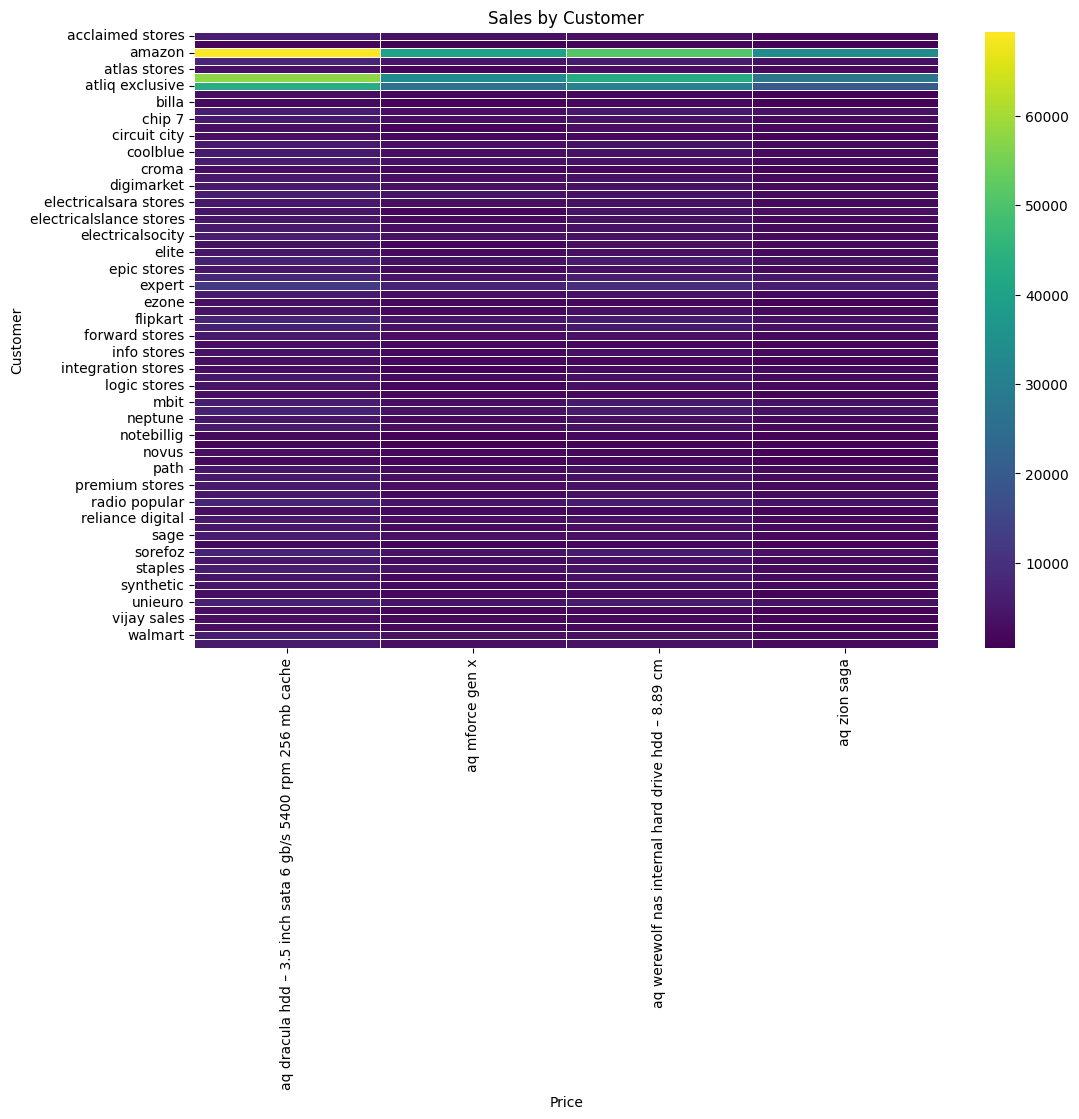

In [82]:
# Which customer generated the most sales vs. least sales?
# Sales by Customer


# Grouping the data by customer and summing up the total sales
total_sales_per_customer = sales_customer.groupby('customer')['sold_quantity'].sum().reset_index()

# Finding the customer with the most sales
most_sales_customer = total_sales_per_customer.loc[total_sales_per_customer['sold_quantity'].idxmax()]

# Finding the customer with the least sales
least_sales_customer = total_sales_per_customer.loc[total_sales_per_customer['sold_quantity'].idxmin()]

print("Customer with the most sales:", most_sales_customer['customer'], "Total Sales:", most_sales_customer['sold_quantity'])
print("Customer with the least sales:", least_sales_customer['customer'], "Total Sales:", least_sales_customer['sold_quantity'])



# Pivot the DataFrame to create a matrix where rows represent customers, columns represent products, and values represent quantity
quantity_matrix = sales_customer_product.pivot_table(index='customer', columns='product', values='gross_price', aggfunc='sum', fill_value=0)

# Visualize the quantity matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(quantity_matrix, cmap='viridis', linecolor='white', linewidths=0.5)
plt.title('Sales by Customer')
plt.xlabel('Price')
plt.ylabel('Customer')
plt.show()


> - <u>Sales by Customer</u>: Amazon has the most sales.

-----

<h1> Financial Analysis </h1>

> - Sales / Revenue / Profits / Margins Research

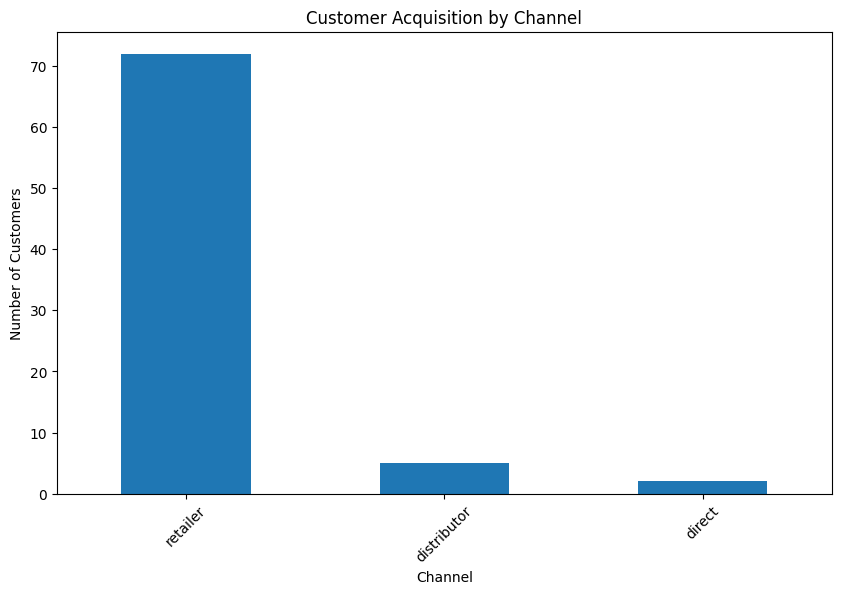

In [83]:
# Channel Performance Analysis:
# Compare the performance of different channels (brick & mortar vs. e-commerce) in terms of customer acquisition and sales. 
# Identify which channels are most effective in reaching your target audience.



# Group the data by channel and count the number of unique customers
customer_acquisition = dim_customer.groupby('channel')['customer'].nunique()

# Sort the market penetration data in descending order
customer_acquisition_sorted = customer_acquisition.sort_values(ascending=False)

# Customer acquisition plot
plt.figure(figsize=(10, 6))
customer_acquisition_sorted.plot(kind='bar')
plt.title('Customer Acquisition by Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

> - Customer acquisition refers to the process of new customers or clients for the business.
> - <u>Customer Acquisition by Channel</u>: The more effictive channel is 'retailer' to reach products.

(array([0, 1, 2]),
 [Text(0, 0, 'retailer'), Text(1, 0, 'direct'), Text(2, 0, 'distributor')])

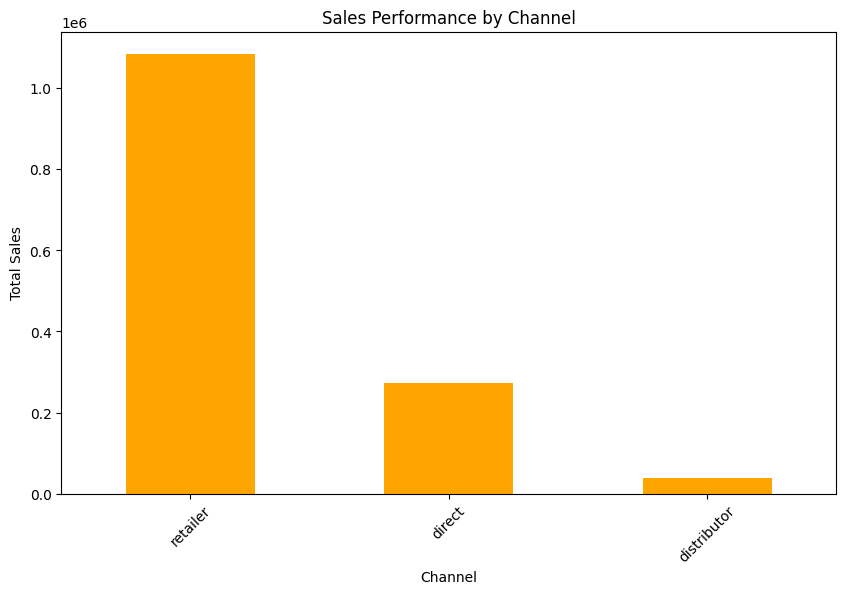

In [84]:
# Analyze sales performance by channel 

sales_performance = sales_customer.groupby('channel')['gross_price'].sum()

# Sort the sales performance data in descending order
sales_performance_sorted = sales_performance.sort_values(ascending=False)

# Plotting the comparison of customer acquisition and sales performance
plt.figure(figsize=(10, 6))
sales_performance_sorted.plot(kind='bar', color= 'orange')
plt.title('Sales Performance by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

> - <u>Sales Performance by Channel</u> The more effective channel through the determination of sales is retailer.

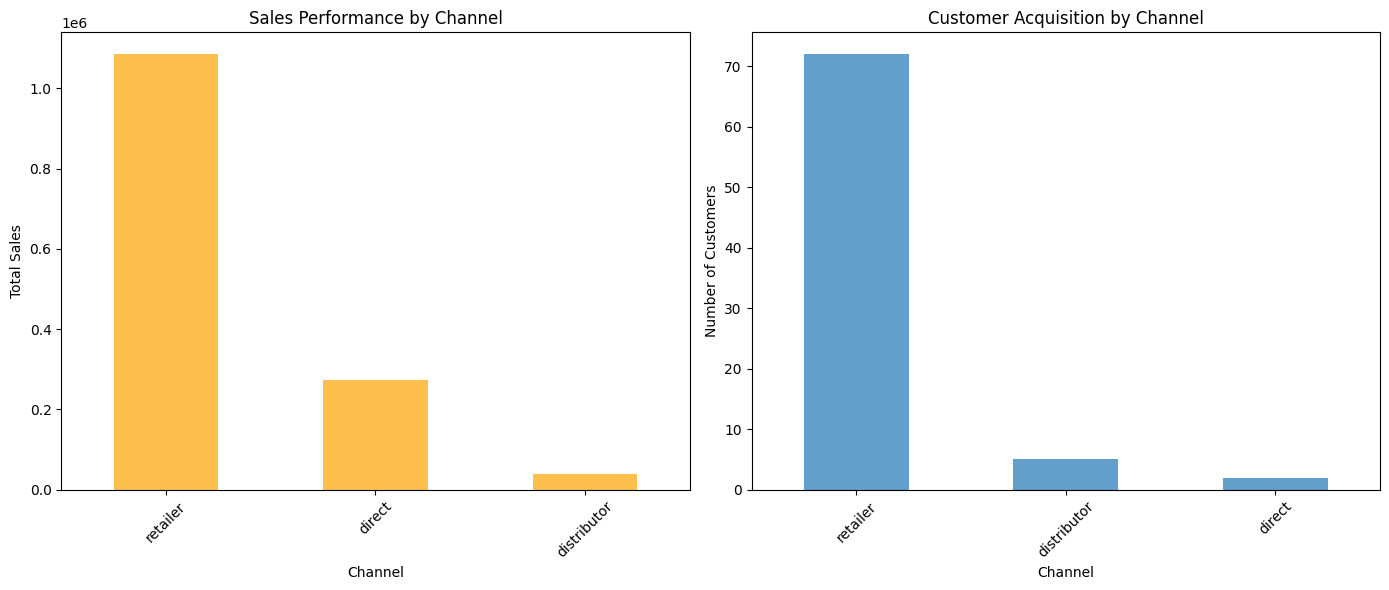

In [85]:
# how does the two plots by channel compare? 


# Create a single figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Sales performance plot
sales_performance_sorted.plot(kind='bar', color='orange', alpha=0.7, ax=ax1)
ax1.set_title('Sales Performance by Channel')
ax1.set_xlabel('Channel')
ax1.set_ylabel('Total Sales')
ax1.tick_params(axis='x', rotation=45)

# Customer acquisition plot
customer_acquisition_sorted.plot(kind='bar', alpha=0.7, ax=ax2)
ax2.set_title('Customer Acquisition by Channel')
ax2.set_xlabel('Channel')
ax2.set_ylabel('Number of Customers')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

> - When assessing the effectiveness of reaching customers, the retailer channel proves most successful based on sales and customer acquisiton data. However, in terms of sales, the direct channel surpasses others, indicating varying strengths across different channels.

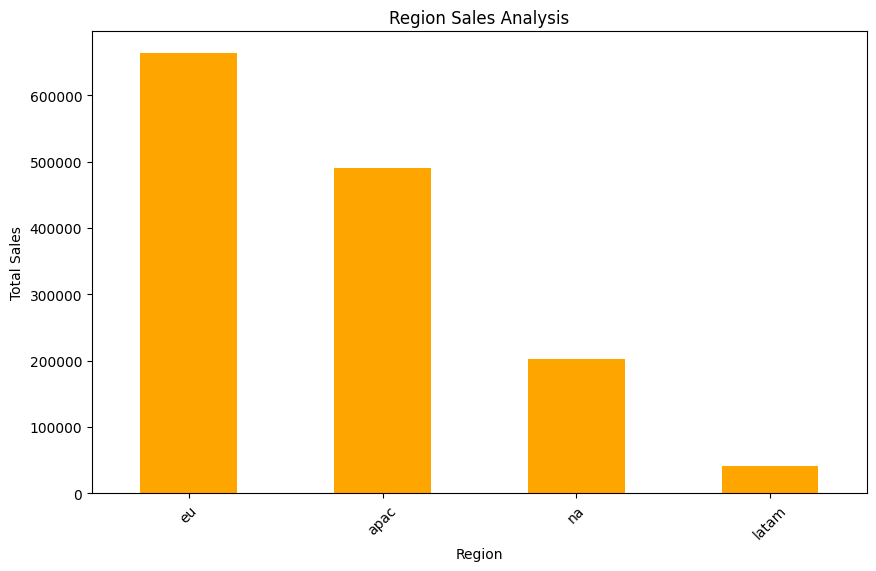

In [86]:
# Region Sales Analysis:
# Analyze sales performance across different regions to identify regions with high potential for growth or regions where adjustments may be needed.


# Group the data by region and calculate total sales
region_sales = sales_customer.groupby('region')['gross_price'].sum()

# Sort in descending order
region_sales_sorted = region_sales.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
region_sales_sorted.plot(kind='bar', color='orange')
plt.title('Region Sales Analysis')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

> - <u>Region Sales Analysis</u>: EU region has the most sales whereas LATAM has the least. 

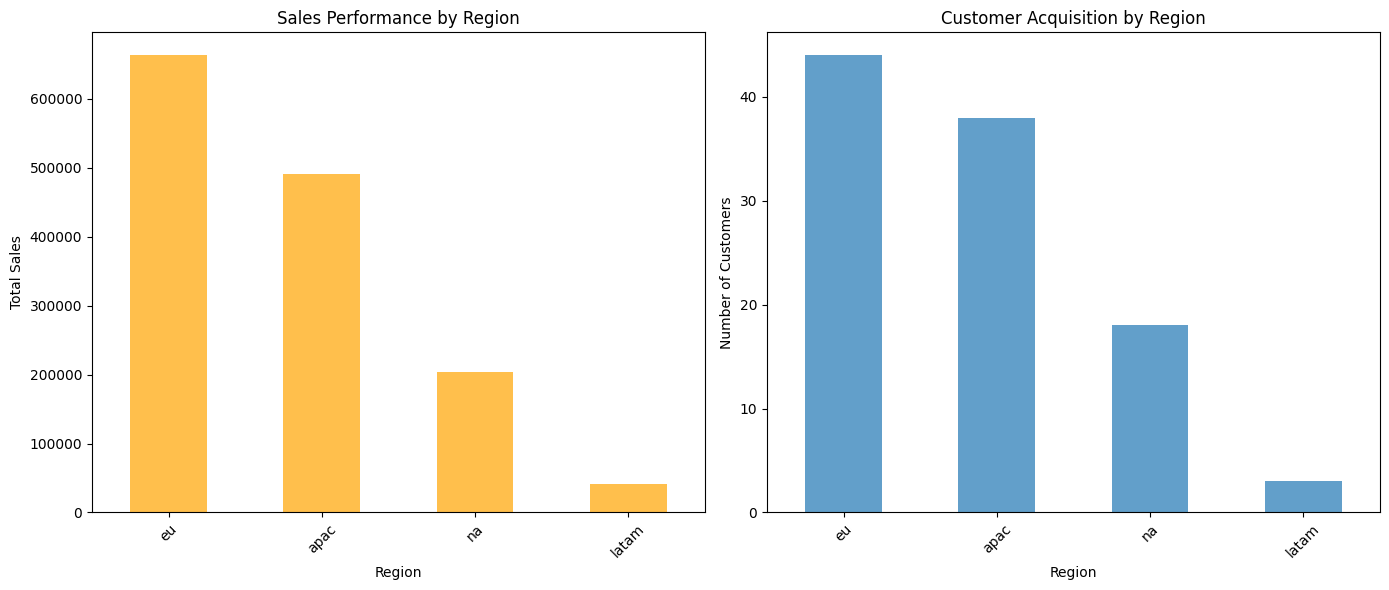

In [87]:
# how do the two plots by region compare? 


# Create a single figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


# Region by Sales
region_sales_sorted.plot(kind='bar', color='orange', alpha=0.7, ax=ax1)
ax1.set_title('Sales Performance by Region')
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Sales')
ax1.tick_params(axis='x', rotation=45)


# Region by Customer
region_distribution_sorted = region_distribution.sort_values(ascending=False)
region_distribution_sorted.plot(kind='bar', alpha=0.7, ax=ax2)
ax2.set_title('Customer Acquisition by Region')
ax2.set_xlabel('Region')
ax2.set_ylabel('Number of Customers')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

> - there is a coralation between sales and customer acquitision by region. 

In [88]:
# Market Saturation Analysis:
# Assess the level of market saturation in different regions and markets to guide strategic decision-making.


# Group the data by 'market', 'sub_zone', and 'region' and calculate total sales volume or customer count
market_penetration = sales_customer.groupby(['market', 'sub_zone', 'region']).size().reset_index(name='total_sales')

# Sort the data by total sales in descending order to identify regions/markets with the highest sales volume
market_penetration = market_penetration.sort_values(by='total_sales', ascending=False)

# Display the top regions/markets with the highest sales volume
print("Top Regions/Markets by Sales Volume:")
display(market_penetration)

# Calculate market share for each region/market
total_sales_all_regions = sales_customer['sold_quantity'].sum()
market_penetration['market_share'] = market_penetration['total_sales'] / total_sales_all_regions

# Display market share for each region/market
print("\nMarket Share for Each Region/Market:")
display(market_penetration[['market', 'sub_zone', 'region', 'market_share']])

Top Regions/Markets by Sales Volume:


,market,sub_zone,region,total_sales
10,india,india,apac,6940
26,usa,na,na,5773
4,canada,na,na,4233
12,italy,se,eu,4208
8,france,se,eu,3855
21,portugal,se,eu,3738
9,germany,ne,eu,3515
25,united kingdom,ne,eu,3439
20,poland,ne,eu,2953
15,netherlands,ne,eu,2765



Market Share for Each Region/Market:


,market,sub_zone,region,market_share
10,india,india,apac,0.001835
26,usa,na,na,0.001526
4,canada,na,na,0.001119
12,italy,se,eu,0.001112
8,france,se,eu,0.001019
21,portugal,se,eu,0.000988
9,germany,ne,eu,0.000929
25,united kingdom,ne,eu,0.000909
20,poland,ne,eu,0.000781
15,netherlands,ne,eu,0.000731


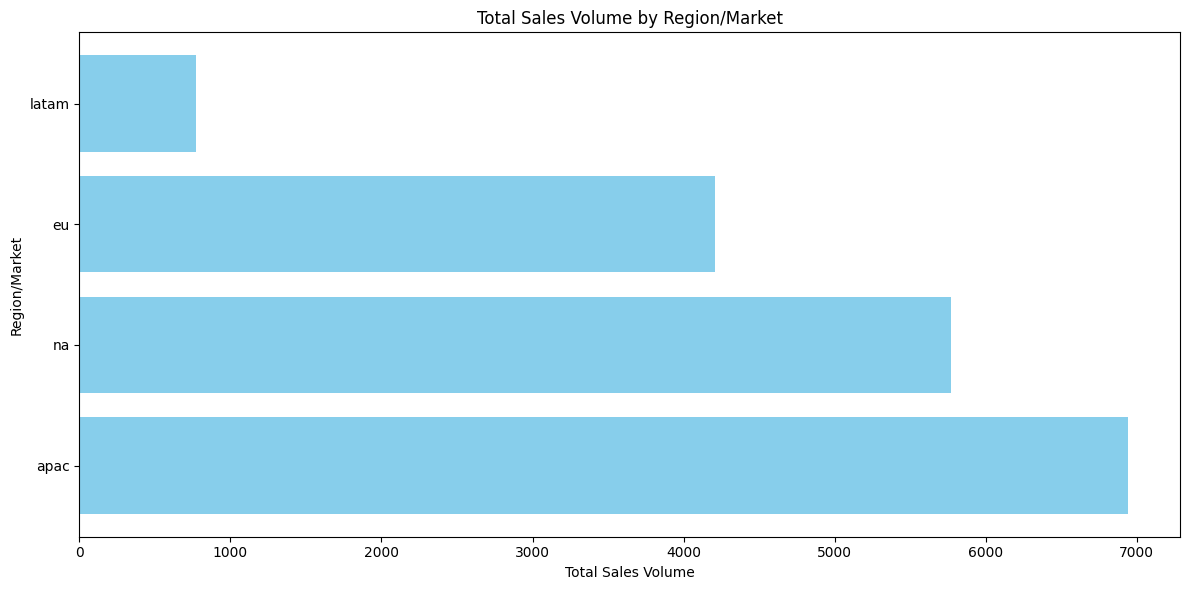

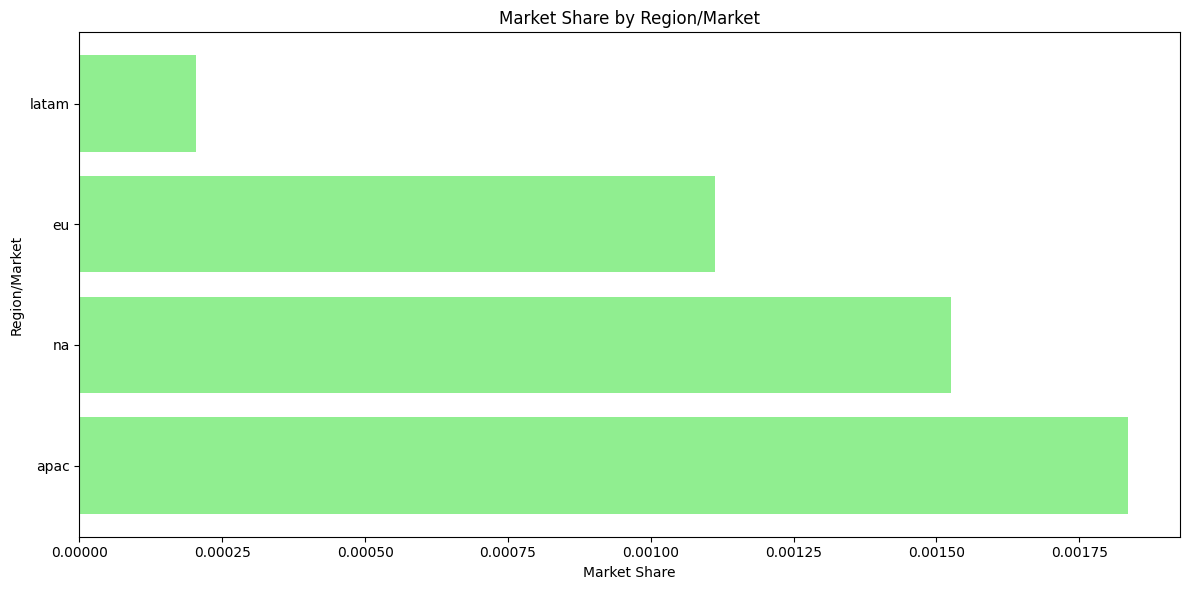

In [89]:
# Plotting total sales volume for each region/market
plt.figure(figsize=(12, 6))
plt.barh(market_penetration['region'], market_penetration['total_sales'], color='skyblue')
plt.xlabel('Total Sales Volume')
plt.ylabel('Region/Market')
plt.title('Total Sales Volume by Region/Market')
plt.tight_layout()
plt.show()

# Plotting market share for each region/market
plt.figure(figsize=(12, 6))
plt.barh(market_penetration['region'], market_penetration['market_share'], color='lightgreen')
plt.xlabel('Market Share')
plt.ylabel('Region/Market')
plt.title('Market Share by Region/Market')
plt.tight_layout()
plt.show()

> - <u>Total Sales Volume by Region/Market</u>: APAC has higher total sales volume, indicating greater market demand or higher sales activity.
> - Conversely, LATAM has lower sales volume, suggesting potential opportunities for growth or improvement strategies. 

> - Market share represents the portion of total sales or revenue that a company captures within a specific market or industry segment. 
> - <u>Market Share by Region/Market</u>: APAC has a larger market share, indicating dominance or a larger share of customer preferences.

> There is a coralation between Total Sales Volume and Market Share.

In [90]:
# Customer Retention Analysis:


# # group data by 'customer_code' column using groupby() method. Then obtain the first purchase date for each customer.
first_purchase_date_by_customer = sales_customer.groupby('customer_code')['date'].min()
print(first_purchase_date_by_customer)

# accessing the Series object's name attribute in first_visit_date_by_user
first_purchase_date_by_customer.name = 'first_purchase_date'

# using join() method to join df_visits dataframe with the Series 'first_visit_date_by_user' on the 'u_id' column 
sales_customer = sales_customer.join(first_purchase_date_by_customer, on='customer_code')
display(sales_customer)

customer_code
70002017   2017-09-01
70002018   2017-09-01
70003181   2017-09-01
70003182   2017-09-01
70004069   2019-09-01
              ...    
90024183   2019-09-01
90024184   2019-10-01
90025209   2019-09-01
90026205   2018-09-01
90027207   2017-09-01
Name: date, Length: 209, dtype: datetime64[ns]


,product_code,fiscal_year,gross_price,date,customer_code,sold_quantity,customer,platform,channel,market,sub_zone,region,week,month,year,first_purchase_date
0,a0118150101,2018,15.3952,2017-09-01,70002017,51.0,atliq exclusive,brick & mortar,direct,india,india,apac,2017-08-28/2017-09-03,2017-09,2017,2017-09-01
1,a0118150101,2018,15.3952,2017-09-01,70002018,77.0,atliq e store,e-commerce,direct,india,india,apac,2017-08-28/2017-09-03,2017-09,2017,2017-09-01
2,a0118150101,2018,15.3952,2017-09-01,70003181,17.0,atliq exclusive,brick & mortar,direct,indonesia,roa,apac,2017-08-28/2017-09-03,2017-09,2017,2017-09-01
3,a0118150101,2018,15.3952,2017-09-01,70003182,6.0,atliq e store,e-commerce,direct,indonesia,roa,apac,2017-08-28/2017-09-03,2017-09,2017,2017-09-01
4,a0118150101,2018,15.3952,2017-09-01,70006157,5.0,atliq exclusive,brick & mortar,direct,philiphines,roa,apac,2017-08-28/2017-09-03,2017-09,2017,2017-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67245,a0418150104,2019,17.5027,2019-06-01,90013122,10.0,radio popular,brick & mortar,retailer,italy,se,eu,2019-05-27/2019-06-02,2019-06,2019,2017-09-01
67246,a0418150104,2019,17.5027,2019-06-01,90013124,16.0,amazon,e-commerce,retailer,italy,se,eu,2019-05-27/2019-06-02,2019-06,2019,2017-10-01
67247,a0418150104,2019,17.5027,2019-06-01,90014136,2.0,reliance digital,brick & mortar,retailer,netherlands,ne,eu,2019-05-27/2019-06-02,2019-06,2019,2018-10-01
67248,a0418150104,2019,17.5027,2019-06-01,90014137,1.0,media markt,brick & mortar,retailer,netherlands,ne,eu,2019-05-27/2019-06-02,2019-06,2019,2018-09-01


In [91]:
# next, single out years from column 'first_purchase_date' 
# convert column values to 'datetime64[Y]', Y stands for year

sales_customer['first_purchase_date'] = pd.to_datetime(sales_customer['first_purchase_date'])
sales_customer['first_purchase_year'] = sales_customer['first_purchase_date'].dt.to_period('Y')


# 'first_visit_year' column will be used to form cohorts 
# group data by this column and apply agg method
# will be passed as a dictionary whose keys are column names and whose values are aggregate functions

# define cohorts based on 'first_visit_month'
sales_customer['cohorts_grouped_year'] = sales_customer.groupby('customer_code')['first_purchase_year'].transform('min')

# calculate cohort metrics (for retention rate and cohort lifetime)
cohorts = sales_customer.groupby(['cohorts_grouped_year', 'year']).agg({'customer_code':'nunique'}).reset_index()
cohorts = cohorts.rename(columns={'customer_code':'customer'})

# convert 'month' to Period
# current dtype is an object, will throw error -- TypeError: unsupported operand type(s) for -: 'Period' and 'str'
cohorts['year'] = pd.to_datetime(cohorts['year']).dt.to_period('Y')

# calculate cohort lifetime
cohorts['cohort_lifetime'] = (cohorts['year'] - cohorts['cohorts_grouped_year']).apply(lambda x: x.n + 1)

# calculate retention rate
cohorts['retention_rate'] = cohorts['customer'] / cohorts.groupby('cohorts_grouped_year')['customer'].transform('first') * 100

# create pivot table
cohort_pivot = cohorts.pivot_table(
    index='cohorts_grouped_year',
    columns= 'cohort_lifetime', 
    values= 'retention_rate',
    aggfunc= 'mean'
)
display(cohort_pivot)

cohort_lifetime,1,2,3,4,5
cohorts_grouped_year,,,,,
2017,100.0,100.0,100.0,100.0,100.0
2018,100.0,100.0,100.0,100.0,NaN
2019,100.0,100.0,100.0,NaN,NaN


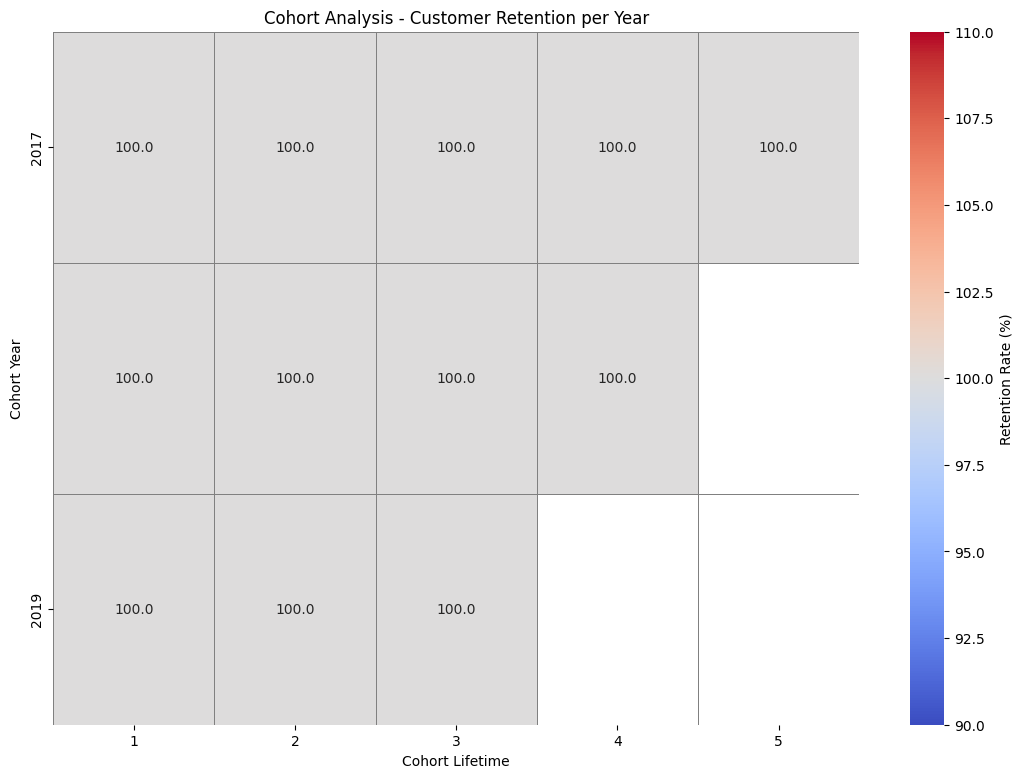

In [92]:
# plot heatmap - visulaization of cohort analysis

plt.figure(figsize=(13,9))
sns.heatmap(
    cohort_pivot, 
    annot=True,
    fmt=".1f",
    linewidths=.5,
    linecolor='gray',
    cmap = 'coolwarm', 
    yticklabels=2, cbar_kws={'label': 'Retention Rate (%)'}
)
plt.title('Cohort Analysis - Customer Retention per Year')
plt.xlabel('Cohort Lifetime')
plt.ylabel('Cohort Year')
plt.show()

> - <u>Customer Retention Per Year</u>: A 100% retention rate means that all customers from a particular cohort have continued to make purchases over time without any churn. In other words, every customer who made their first purchase during the initial period (the cohort) has made subsequent purchases consistently without leaving or becoming inactive.
> - Retention rate analysis result aligns with the <b>trend analysis</b>:

Text(0, 0.5, 'Sales')

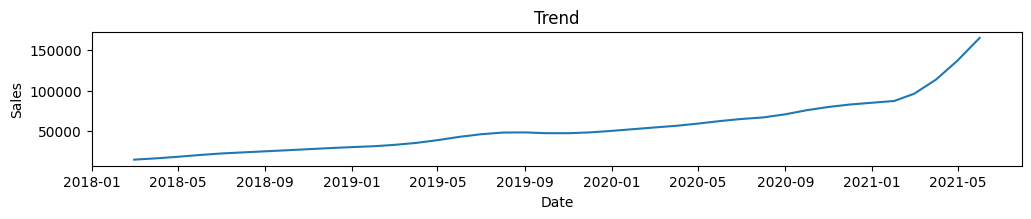

In [93]:
# Trend plot
plt.figure(figsize=(12, 8))
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend')
plt.xlabel('Date')
plt.ylabel('Sales')

In [98]:
# customer lifetime value (CLV)
# CLV= Average Purchase Value * Purchase Frequency * Customer Lifespan / churn rate
 

# Convert the 'date' column to datetime
sales_customer_product_cost['date'] = pd.to_datetime(sales_customer_product_cost['date'])


# Calculate Average Purchase Value 
average_purchase_value = sales_customer_product_cost.groupby('customer_code')['gross_price'].mean().mean()
print(f'Average Purchase Value: ${average_purchase_value:.2f}')

# Calculate Purchase Frequency
purchase_frequency = len(sales_customer_product_cost) / len(sales_customer_product_cost['customer_code'].unique())
print(f'Purchase Frequency: {purchase_frequency:.2f}')

# Calculate Customer Lifespan
total_customer_lifespan = (sales_customer_product_cost['date'].max() - sales_customer_product_cost['date'].min()).days
print(f'Total Customer Lifespan: {total_customer_lifespan} days')

average_customer_lifespan = total_customer_lifespan / len(sales_customer_product_cost['customer_code'].unique())
print(f'Average Customer Lifespan: {average_customer_lifespan:.2f} days')

# Calculate Churn Rate
churn_rate = 1 - (len(sales_customer_product_cost['customer_code'].unique()) / len(sales_customer_product_cost))
print(f'Churn Rate: ${churn_rate:.2f}')

# Calculate CLV
clv = (average_purchase_value * purchase_frequency * average_customer_lifespan) / churn_rate
print(f'Customer Lifetime Value (CLV): ${clv:.2f}')


Average Purchase Value: $20.97
Purchase Frequency: 321.77
Total Customer Lifespan: 1552 days
Average Customer Lifespan: 7.43 days
Churn Rate: $1.00
Customer Lifetime Value (CLV): $50262.55


In [103]:
# LTV = average revenue per user x average customer lifespan



# calculate average revenue per customer
average_revenue_per_customer = sales_customer_product_cost.groupby('customer_code')['gross_price'].sum().mean()

# calculate average lifespan of a customer (assuming it's the duration between the first and last purchase)
customer_lifespan = (sales_customer_product_cost.groupby('customer_code')['date'].max() - sales_customer_product_cost.groupby('customer_code')['date'].min()).mean()

avg_customer_lifespan = customer_lifespan / len(sales_customer_product_cost['customer_code'].unique())
print(f'Average Customer Lifespan: {average_customer_lifespan:.2f} days')

# calculate LTV
ltv = average_revenue_per_customer * avg_customer_lifespan.days  # Convert timedelta to days

print(f'Average Profit per Customer: ${average_revenue_per_customer:.2f}')

print(f'LTV: ${ltv:.2f}')

Average Customer Lifespan: 7.43 days
Average Profit per Customer: $6690.45
LTV: $40142.72


> Customer Lifetime Value (CLV) and Lifetime Value (LTV) are often used interchangeably, but in some contexts, they may have slightly different meanings:
> - CLV often focuses on predicting future revenue from a customer
> - LTV looks at the actual revenue generated by a customer throughout their entire relationship with the business.

> - CLV is higher than LTV in this analysis.

Total manufacturing cost per fiscal year: manufacturing_date
2018-01-01     4351.9150
2019-01-01     9153.2698
2020-01-01    14250.2936
2021-01-01    21396.4751
2022-01-01    25314.8450
Name: manufacturing_cost, dtype: float64


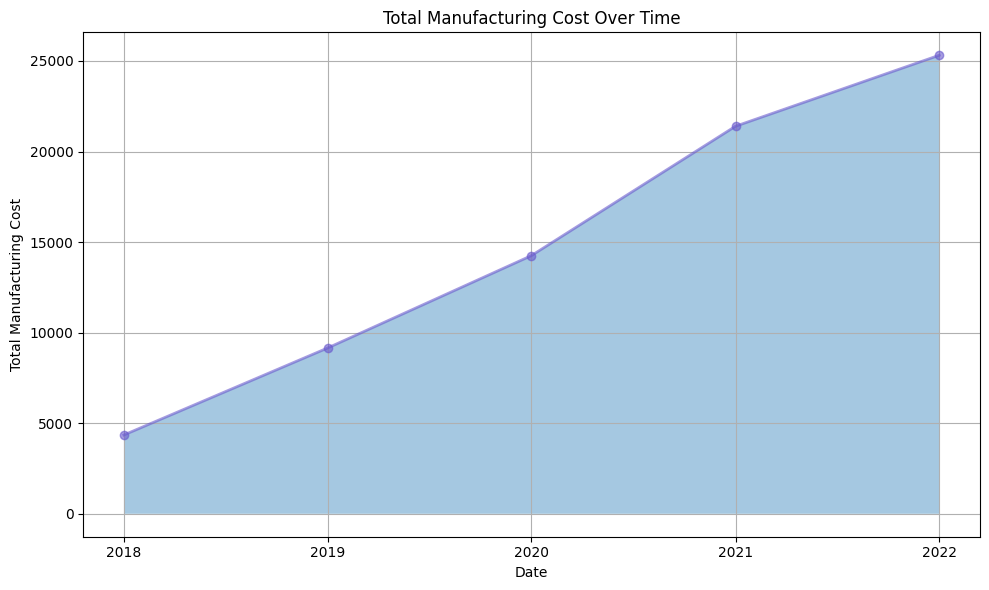

In [104]:
# How much money was used to manufacture products overall per fiscal year? 


# Convert 'fiscal_year' to datetime
fact_manufacturing_cost['manufacturing_date'] = pd.to_datetime(fact_manufacturing_cost['fiscal_year'], format='%Y')

# Group by 'manufacturing_date' and sum the manufacturing costs
total_cost_over_time = fact_manufacturing_cost.groupby('manufacturing_date')['manufacturing_cost'].sum()

# Print the total manufacturing cost over time
print("Total manufacturing cost per fiscal year:", total_cost_over_time)

# Create a line plot
plt.figure(figsize=(10, 6))
plt.fill_between(total_cost_over_time.index, total_cost_over_time.values, alpha=0.4)
plt.plot(total_cost_over_time.index, total_cost_over_time.values, color='Slateblue', alpha=0.6, linewidth=2, marker='o')

plt.title('Total Manufacturing Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Total Manufacturing Cost')

# Set x-axis labels to display only the year part
plt.xticks(total_cost_over_time.index, [x.strftime('%Y') for x in total_cost_over_time.index], rotation=0)

plt.grid(True)
plt.tight_layout()
plt.show()


____

<h1>Conclusion</h1>

Following a thorough audit of AtliQ Hardware's sales operations and data processes, the findings reveal several key insights. Amazon emerges as the top-contributing customer, while brick-and-mortar retailing proves more effective than e-commerce channels. Many customers prefer purchasing products through retailers. The standout product, "AQ Dracula HDD - 3.5inch sata 6gb/s 5400rpm 256mb cache," leads in sales. Although AtliQ Hardware dominates the market in India, its strongest region is in the EU. Customer acquisition shows an increasing trend from 2017 to 2019, plateauing thereafter, while sales exhibit exponential growth over time. Manufacturing costs also demonstrate a similar upward trajectory. 
<br>
Should AtliQ Hardware furnish additional data, it would address the current gaps in analyzing customer acquisition costs and return on investment. Furthermore, if more comprehensive data is provided, it could address the underperforming e-commerce segment by conducting a thorough website A/B testing analysis.

____

> creating clean CSV files for database to be able to create tableau dashboard.

In [105]:
#dim_customer dataframe to CSV

display(dim_customer) 
dim_customer.to_csv('dim_customer.csv', index=False)

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,atliq exclusive,brick & mortar,direct,india,india,apac
1,70002018,atliq e store,e-commerce,direct,india,india,apac
2,70003181,atliq exclusive,brick & mortar,direct,indonesia,roa,apac
3,70003182,atliq e store,e-commerce,direct,indonesia,roa,apac
4,70004069,atliq exclusive,brick & mortar,direct,japan,roa,apac
...,...,...,...,...,...,...,...
204,90024183,electricalsbea stores,brick & mortar,retailer,chile,latam,latam
205,90024184,amazon,e-commerce,retailer,chile,latam,latam
206,90025209,electricalsbea stores,brick & mortar,retailer,columbia,latam,latam
207,90026205,amazon,e-commerce,retailer,mexico,latam,latam


In [106]:
#dim_product dataframe to CSV

display(dim_product) 
dim_product.to_csv('dim_product.csv', index=False)

,product_code,division,segment,category,product,variant
0,a0118150101,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard
1,a0118150102,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,plus
2,a0118150103,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,premium
3,a0118150104,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,premium plus
4,a0219150201,p & a,peripherals,internal hdd,aq werewolf nas internal hard drive hdd – 8.89 cm,standard
...,...,...,...,...,...,...
392,a7220160202,n & s,networking,wi fi extender,aq wi power dx2,plus
393,a7220160203,n & s,networking,wi fi extender,aq wi power dx2,premium
394,a7321160301,n & s,networking,wi fi extender,aq wi power dx3,standard
395,a7321160302,n & s,networking,wi fi extender,aq wi power dx3,plus


In [107]:
#fact_gross_price dataframe to CSV

display(fact_gross_price) 
fact_gross_price.to_csv('fact_gross_price.csv', index=False)

,product_code,fiscal_year,gross_price
0,a0118150101,2018,15.3952
1,a0118150101,2019,14.4392
2,a0118150101,2020,16.2323
3,a0118150101,2021,19.0573
4,a0118150102,2018,19.5875
...,...,...,...
1177,a7321160301,2022,44.6260
1178,a7321160302,2021,43.9446
1179,a7321160302,2022,46.0399
1180,a7321160303,2021,42.8483


In [108]:
#fact_manufacturing_cost dataframe to CSV

display(fact_manufacturing_cost) 
fact_manufacturing_cost.to_csv('fact_manufacturing_cost.csv', index=False)

,product_code,fiscal_year,manufacturing_cost,manufacturing_date
0,a0118150101,2018,4.6190,2018-01-01
1,a0118150101,2019,4.2033,2019-01-01
2,a0118150101,2020,5.0207,2020-01-01
3,a0118150101,2021,5.5172,2021-01-01
4,a0118150102,2018,5.6036,2018-01-01
...,...,...,...,...
1177,a7321160301,2022,13.4069,2022-01-01
1178,a7321160302,2021,12.5670,2021-01-01
1179,a7321160302,2022,13.1954,2022-01-01
1180,a7321160303,2021,12.9502,2021-01-01


In [109]:
#fact_pre_discount dataframe to CSV

display(fact_pre_discount) 
fact_pre_discount.to_csv('fact_pre_discount.csv', index=False)

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057
...,...,...,...
1040,90027207,2018,0.2803
1041,90027207,2019,0.2248
1042,90027207,2020,0.2386
1043,90027207,2021,0.2772


In [110]:
#fact_sales_monthly dataframe to CSV

display(fact_sales_monthly) 
fact_sales_monthly.to_csv('fact_sales_monthly.csv', index=False)

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,a0118150101,70002017,51.0,2018
1,2017-09-01,a0118150101,70002018,77.0,2018
2,2017-09-01,a0118150101,70003181,17.0,2018
3,2017-09-01,a0118150101,70003182,6.0,2018
4,2017-09-01,a0118150101,70006157,5.0,2018
...,...,...,...,...,...
67245,2019-06-01,a0418150104,90013122,10.0,2019
67246,2019-06-01,a0418150104,90013124,16.0,2019
67247,2019-06-01,a0418150104,90014136,2.0,2019
67248,2019-06-01,a0418150104,90014137,1.0,2019


In [112]:
# merge dim_product and fact_sales_monthly to find null values of products in 'sold_quantity' (unsold products)

sales_of_products = pd.merge(dim_product, fact_sales_monthly, on=['product_code'], how='left')
print('product_sales dataframe:')
display(sales_of_products)


# covert dataframe to CSV to use in tableau
sales_of_products.to_csv('sales_of_product.csv', index=False)

product_sales dataframe:


,product_code,division,segment,category,product,variant,date,customer_code,sold_quantity,fiscal_year
0,a0118150101,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard,2017-09-01,70002017,51.0,2018.0
1,a0118150101,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard,2017-09-01,70002018,77.0,2018.0
2,a0118150101,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard,2017-09-01,70003181,17.0,2018.0
3,a0118150101,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard,2017-09-01,70003182,6.0,2018.0
4,a0118150101,p & a,peripherals,internal hdd,aq dracula hdd – 3.5 inch sata 6 gb/s 5400 rpm 256 mb cache,standard,2017-09-01,70006157,5.0,2018.0
...,...,...,...,...,...,...,...,...,...,...
67628,a7220160202,n & s,networking,wi fi extender,aq wi power dx2,plus,NaN,NaN,NaN,NaN
67629,a7220160203,n & s,networking,wi fi extender,aq wi power dx2,premium,NaN,NaN,NaN,NaN
67630,a7321160301,n & s,networking,wi fi extender,aq wi power dx3,standard,NaN,NaN,NaN,NaN
67631,a7321160302,n & s,networking,wi fi extender,aq wi power dx3,plus,NaN,NaN,NaN,NaN


<h1>Tableau Dashboard:</h1>

> the tableau dashboard can be found through this link: https://public.tableau.com/app/profile/stephanie7878/viz/Sprint12-Project_v2/Story1?publish=yes